# **Importing Modules and Libraries**

In [212]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# **Importing Datasets:TIỀN XỬ LÍ** 

In [213]:
# import os
# from google.colab import drive

# Mount Google Drive
# drive.mount('/content/gdrive')
# os.chdir('/content/gdrive/MyDrive/Papi')
!wget "https://drive.google.com/uc?export=download&id=1cPlyRYexAZPZv8r2vPOfNmapgdiBYnb_" -O "UNSW_NB15.csv"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [214]:
#data = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15.csv')
data = pd.read_csv('UNSW_NB15.csv')

In [215]:
#khdv
data = data.sample(10000, random_state=42)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15482 to 119098
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   dur                10000 non-null  float64
 2   proto              10000 non-null  object 
 3   service            10000 non-null  object 
 4   state              10000 non-null  object 
 5   spkts              10000 non-null  int64  
 6   dpkts              10000 non-null  int64  
 7   sbytes             10000 non-null  int64  
 8   dbytes             10000 non-null  int64  
 9   rate               10000 non-null  float64
 10  sttl               10000 non-null  int64  
 11  dttl               10000 non-null  int64  
 12  sload              10000 non-null  float64
 13  dload              10000 non-null  float64
 14  sloss              10000 non-null  int64  
 15  dloss              10000 non-null  int64  
 16  sinpkt             100

In [216]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
15482,15483,2.736664,tcp,-,FIN,232,438,13350,548216,244.458211,...,1,5,0,0,0,4,10,0,Normal,0
133349,133350,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,10,10,0,0,0,10,10,0,Generic,1
80485,80486,5.788526,tcp,-,FIN,36,34,6102,3892,11.920133,...,1,4,0,0,0,2,4,0,Exploits,1
29972,29973,3.849634,tcp,-,FIN,448,858,25160,1094788,338.993271,...,1,6,0,0,0,2,9,0,Normal,0
18339,18340,0.001052,udp,dns,CON,2,2,130,162,2851.711087,...,1,1,0,0,0,3,3,0,Normal,0


In [217]:
data.info() # in ra thông tin cấu trúc của DataFrame.

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15482 to 119098
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   dur                10000 non-null  float64
 2   proto              10000 non-null  object 
 3   service            10000 non-null  object 
 4   state              10000 non-null  object 
 5   spkts              10000 non-null  int64  
 6   dpkts              10000 non-null  int64  
 7   sbytes             10000 non-null  int64  
 8   dbytes             10000 non-null  int64  
 9   rate               10000 non-null  float64
 10  sttl               10000 non-null  int64  
 11  dttl               10000 non-null  int64  
 12  sload              10000 non-null  float64
 13  dload              10000 non-null  float64
 14  sloss              10000 non-null  int64  
 15  dloss              10000 non-null  int64  
 16  sinpkt             100

In [218]:
data[data['service']=='-'] #Lọc các dòng có giá trị service là '-'

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
15482,15483,2.736664,tcp,-,FIN,232,438,13350,548216,244.458211,...,1,5,0,0,0,4,10,0,Normal,0
80485,80486,5.788526,tcp,-,FIN,36,34,6102,3892,11.920133,...,1,4,0,0,0,2,4,0,Exploits,1
29972,29973,3.849634,tcp,-,FIN,448,858,25160,1094788,338.993271,...,1,6,0,0,0,2,9,0,Normal,0
55215,55216,1.465899,tcp,-,FIN,34,16,28660,814,33.426587,...,1,4,0,0,0,2,4,0,Fuzzers,1
22160,22161,0.022733,tcp,-,FIN,48,50,2958,33044,4266.924890,...,1,3,0,0,0,2,5,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152652,152653,0.000008,udp,-,INT,2,0,184,0,125000.000300,...,1,5,0,0,0,3,5,0,Fuzzers,1
109359,109360,0.000006,sun-nd,-,INT,2,0,200,0,166666.660800,...,3,4,0,0,0,3,4,0,Exploits,1
128971,128972,0.000008,unas,-,INT,2,0,200,0,125000.000300,...,3,6,0,0,0,4,6,0,Analysis,1
158087,158088,0.513983,tcp,-,FIN,10,6,756,268,29.183844,...,1,3,0,0,0,2,3,0,Fuzzers,1


In [219]:
data['service'].replace('-',np.nan,inplace=True) # Thay thế các giá trị '-' trong cột 'service' bằng NaN
# biểu thị giá trị thiếu → pandas và các hàm thống kê không hiểu '-'.

C:\Users\asus\AppData\Local\Temp\ipykernel_34192\2606979873.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service'].replace('-',np.nan,inplace=True) # Thay thế các giá trị '-' trong cột 'service' bằng NaN


In [220]:
data.isnull().sum()

id                      0
dur                     0
proto                   0
service              5387
state                   0
spkts                   0
dpkts                   0
sbytes                  0
dbytes                  0
rate                    0
sttl                    0
dttl                    0
sload                   0
dload                   0
sloss                   0
dloss                   0
sinpkt                  0
dinpkt                  0
sjit                    0
djit                    0
swin                    0
stcpb                   0
dtcpb                   0
dwin                    0
tcprtt                  0
synack                  0
ackdat                  0
smean                   0
dmean                   0
trans_depth             0
response_body_len       0
ct_srv_src              0
ct_state_ttl            0
ct_dst_ltm              0
ct_src_dport_ltm        0
ct_dst_sport_ltm        0
ct_dst_src_ltm          0
is_ftp_login            0
ct_ftp_cmd  

In [221]:
data.shape
#data.shape trả về một tuple (rows, columns)

(10000, 45)

In [222]:
data.dropna(inplace=True)
#tất cả dòng mà có ít nhất một giá trị thiếu (NaN) sẽ bị xóa khỏi DataFrame.
# inplace=True: thay đổi được thực hiện trực tiếp trên DataFrame gốc mà không cần tạo bản sao.

In [223]:
data.shape

(4613, 45)

In [224]:
data['attack_cat'].value_counts()
# Chọn cột attack_cat và đếm số lần xuất hiện của mỗi giá trị duy nhất trong cột đó.

attack_cat
Generic           2225
Normal            1078
Exploits           978
DoS                102
Fuzzers             98
Reconnaissance      86
Analysis            33
Worms                9
Backdoor             4
Name: count, dtype: int64

In [225]:
data['label'].value_counts()


label
1    3535
0    1078
Name: count, dtype: int64

In [226]:
data['state'].value_counts()

state
INT    2242
FIN    1954
CON     404
REQ      12
RST       1
Name: count, dtype: int64

In [227]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
133349,133350,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,10,10,0,0,0,10,10,0,Generic,1
18339,18340,0.001052,udp,dns,CON,2,2,130,162,2851.711087,...,1,1,0,0,0,3,3,0,Normal,0
170500,170501,0.000005,udp,dns,INT,2,0,114,0,200000.005100,...,12,34,0,0,0,25,34,0,Generic,1
165830,165831,0.000008,udp,dns,INT,2,0,114,0,125000.000300,...,9,9,0,0,0,9,9,0,Generic,1
37756,37757,0.034137,tcp,smtp,FIN,52,42,37492,3380,2724.316772,...,1,1,0,0,0,2,1,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169264,169265,0.595368,tcp,http,FIN,10,8,848,2684,28.553767,...,1,1,0,0,1,2,1,0,Exploits,1
98378,98379,0.361394,tcp,http,FIN,12,28,918,30524,107.915464,...,1,1,0,0,1,2,1,0,Exploits,1
22233,22234,0.020101,tcp,smtp,FIN,52,42,37210,3380,4626.635577,...,1,4,0,0,0,3,1,0,Normal,0
80101,80102,0.679350,tcp,http,FIN,12,26,1076,29722,54.463824,...,1,1,0,0,1,2,1,0,Exploits,1


In [228]:
!wget "https://drive.google.com/uc?export=download&id=1D3hkSlWkWJ4SzFT5q0BMkebYweVm1dVi" -O "UNSW_NB15_features.csv"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [229]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('UNSW_NB15_features.csv')

In [230]:
features
# features.info()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [231]:
features['Type '] = features['Type '].str.lower()

In [232]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [233]:
# selecting common column names from dataset and feature dataset
#iểm tra xem những cột này thực sự tồn tại trong data hay không
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [234]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [235]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [236]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [237]:
data.info()
#numeric — điều này nghĩa là các cột dạng object (chuỗi) sẽ được chuyển sang dạng số (ví dụ bằng LabelEncoder hoặc One-Hot Encoding), để mô hình học máy hiểu được.


<class 'pandas.core.frame.DataFrame'>
Index: 4613 entries, 133349 to 37906
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4613 non-null   int64  
 1   dur                4613 non-null   float64
 2   proto              4613 non-null   object 
 3   service            4613 non-null   object 
 4   state              4613 non-null   object 
 5   spkts              4613 non-null   int64  
 6   dpkts              4613 non-null   int64  
 7   sbytes             4613 non-null   int64  
 8   dbytes             4613 non-null   int64  
 9   rate               4613 non-null   float64
 10  sttl               4613 non-null   int64  
 11  dttl               4613 non-null   int64  
 12  sload              4613 non-null   float64
 13  dload              4613 non-null   float64
 14  sloss              4613 non-null   int64  
 15  dloss              4613 non-null   int64  
 16  sinpkt             4613

In [238]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
133349,133350,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,10,10,0,0,0,10,10,0,Generic,1
18339,18340,0.001052,udp,dns,CON,2,2,130,162,2851.711087,...,1,1,0,0,0,3,3,0,Normal,0
170500,170501,0.000005,udp,dns,INT,2,0,114,0,200000.005100,...,12,34,0,0,0,25,34,0,Generic,1
165830,165831,0.000008,udp,dns,INT,2,0,114,0,125000.000300,...,9,9,0,0,0,9,9,0,Generic,1
37756,37757,0.034137,tcp,smtp,FIN,52,42,37492,3380,2724.316772,...,1,1,0,0,0,2,1,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169264,169265,0.595368,tcp,http,FIN,10,8,848,2684,28.553767,...,1,1,0,0,1,2,1,0,Exploits,1
98378,98379,0.361394,tcp,http,FIN,12,28,918,30524,107.915464,...,1,1,0,0,1,2,1,0,Exploits,1
22233,22234,0.020101,tcp,smtp,FIN,52,42,37210,3380,4626.635577,...,1,4,0,0,0,3,1,0,Normal,0
80101,80102,0.679350,tcp,http,FIN,12,26,1076,29722,54.463824,...,1,1,0,0,1,2,1,0,Exploits,1


# **Data Visualization**

## **Binary Classification**

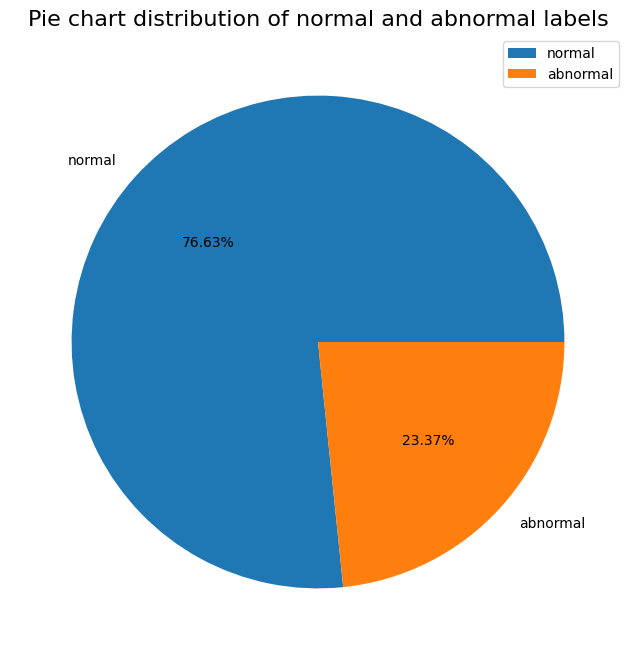

In [239]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
# plt.savefig('plots/Pie_chart_binary.png')
plt.show()

## **Multi-class Classification NEXT**

In [240]:
# plt.figure(figsize=(8,8))
# plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
# plt.title('Pie chart distribution of multi-class labels')
# plt.legend(loc='best')
# # plt.savefig('plots/Pie_chart_multi.png')
# plt.show()
# #→ Lúc này model phải phân biệt nhiều loại tấn công khác nhau, 
# # chứ không chỉ "tấn công" hay "không".

# **PASSOne hot encoding** 

In [241]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col) # loại trừ kiểu số để ra phân loại
cat_col = cat_col[1:]
cat_col
#tách riêng cột dạng phân loại (categorical) 
# ra khỏi dữ liệu gốc để chuẩn bị mã hóa (encoding).

Index(['proto', 'service', 'state'], dtype='object')

In [242]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head(n=10)
#thì data_cat chỉ là một view (ảnh chiếu) 
# của DataFrame data gốc — nghĩa là:nếu bro thay đổi dữ liệu 
# trong data_cat, có thể ảnh hưởng trực tiếp tới data gốc (hoặc ngược lại).

,proto,service,state
133349,udp,dns,INT
18339,udp,dns,CON
170500,udp,dns,INT
165830,udp,dns,INT
37756,tcp,smtp,FIN
133422,udp,dns,INT
81342,tcp,http,FIN
164646,tcp,http,FIN
121375,tcp,smtp,FIN
122477,tcp,smtp,FIN


In [243]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
##Hàm của pandas để tự động mã hóa one-hot
data_cat = pd.get_dummies(data_cat,columns=cat_col)
#Máy học (ML model) không hiểu chữ, nó chỉ hiểu số.
#→ One-hot encoding sẽ chuyển từng giá trị duy nhất (unique) thành một cột nhị phân (0 hoặc 1).
#| proto_tcp | proto_udp | state_FIN | state_EST | state_INT |
#| --------- | --------- | --------- | --------- | --------- |
#| 1         | 0         | 1         | 0         | 0         |
#| 0         | 1         | 0         | 1         | 0         |
#| 1         | 0         | 0         | 0         | 1         |
#kiểu protoco tách thành 2 cột riêng biệt

In [244]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
133349,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
18339,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
170500,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
165830,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
37756,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [245]:
data.shape



(4613, 45)

In [246]:
data = pd.concat([data, data_cat],axis=1)
#➡ Gộp các cột mới (đã mã hóa) từ data_cat vào data gốc


In [247]:
data.shape

(4613, 63)

In [248]:
data.drop(columns=cat_col,inplace=True)

In [249]:
data.shape

(4613, 60)

# **Data Normalization:CHUẨN HÓA**


In [250]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)
#num_col là danh sách các cột số thực sự cần chuẩn hóa

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [251]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1)) #range 0,1
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df
##phương pháp Min–Max Scaling,

In [252]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
133349,133350,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,False,False,False,False,False,False,False,True,False,False
18339,18340,0.001052,2,2,130,162,2851.711087,31,29,4.942966e+05,...,False,False,False,False,False,True,False,False,False,False
170500,170501,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,...,False,False,False,False,False,False,False,True,False,False
165830,165831,0.000008,2,0,114,0,125000.000300,254,0,5.700000e+07,...,False,False,False,False,False,False,False,True,False,False
37756,37757,0.034137,52,42,37492,3380,2724.316772,31,29,8.617278e+06,...,False,True,False,False,False,False,True,False,False,False


In [253]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [254]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
133349,133350,1.333405e-07,0.000137,0.000000,2.071516e-07,0.000000,0.111111,0.995536,0.000000,0.076968,...,False,False,False,False,False,False,False,True,False,False
18339,18340,1.751761e-05,0.000137,0.000184,1.864364e-06,0.000011,0.002852,0.000000,0.115079,0.000751,...,False,False,False,False,False,True,False,False,False,False
170500,170501,6.667027e-08,0.000137,0.000000,2.071516e-07,0.000000,0.200000,0.995536,0.000000,0.138542,...,False,False,False,False,False,False,False,True,False,False
165830,165831,1.166730e-07,0.000137,0.000000,2.071516e-07,0.000000,0.125000,0.995536,0.000000,0.086589,...,False,False,False,False,False,False,False,True,False,False
37756,37757,5.689641e-04,0.006995,0.003871,3.871663e-03,0.000233,0.002724,0.000000,0.115079,0.013090,...,False,True,False,False,False,False,True,False,False,False


# **Label Encoding:MÃ NHÃN**

## **Binary Labels**

In [255]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))
#phân loại label 0 thành 'normal', các giá trị khác thành 'abnormal'

In [256]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy() #copy lại để ko ảnh hg bản gốc
bin_data['label'] = bin_label

In [257]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform) #học và gán mã số cho từng giá trị khác nhau.
bin_data['label'] = enc_label #áp dụng cho toàn bộ cột label.

In [258]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [259]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## **Multi-class Labels**

In [260]:

# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [261]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [262]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [263]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [264]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

# **Correlation between features of dataset:TƯƠNG QUAN**

In [265]:
# num_col.append('label')
if num_col.count('label') > 0:
  num_col.remove('label')
if num_col.count('is_sm_ips_ports') > 0:
  num_col.remove('is_sm_ips_ports')
if num_col.count('id') > 0:
  num_col.remove('id')
  ##phân tích tương quan giwuxa các thuộc tính số
  ##loại bỏ những cột không cần tính tương quan 
  # (vì chúng không phải đặc trưng thực tế để phân tích).

## **Correlation Matrix for Binary Labels**

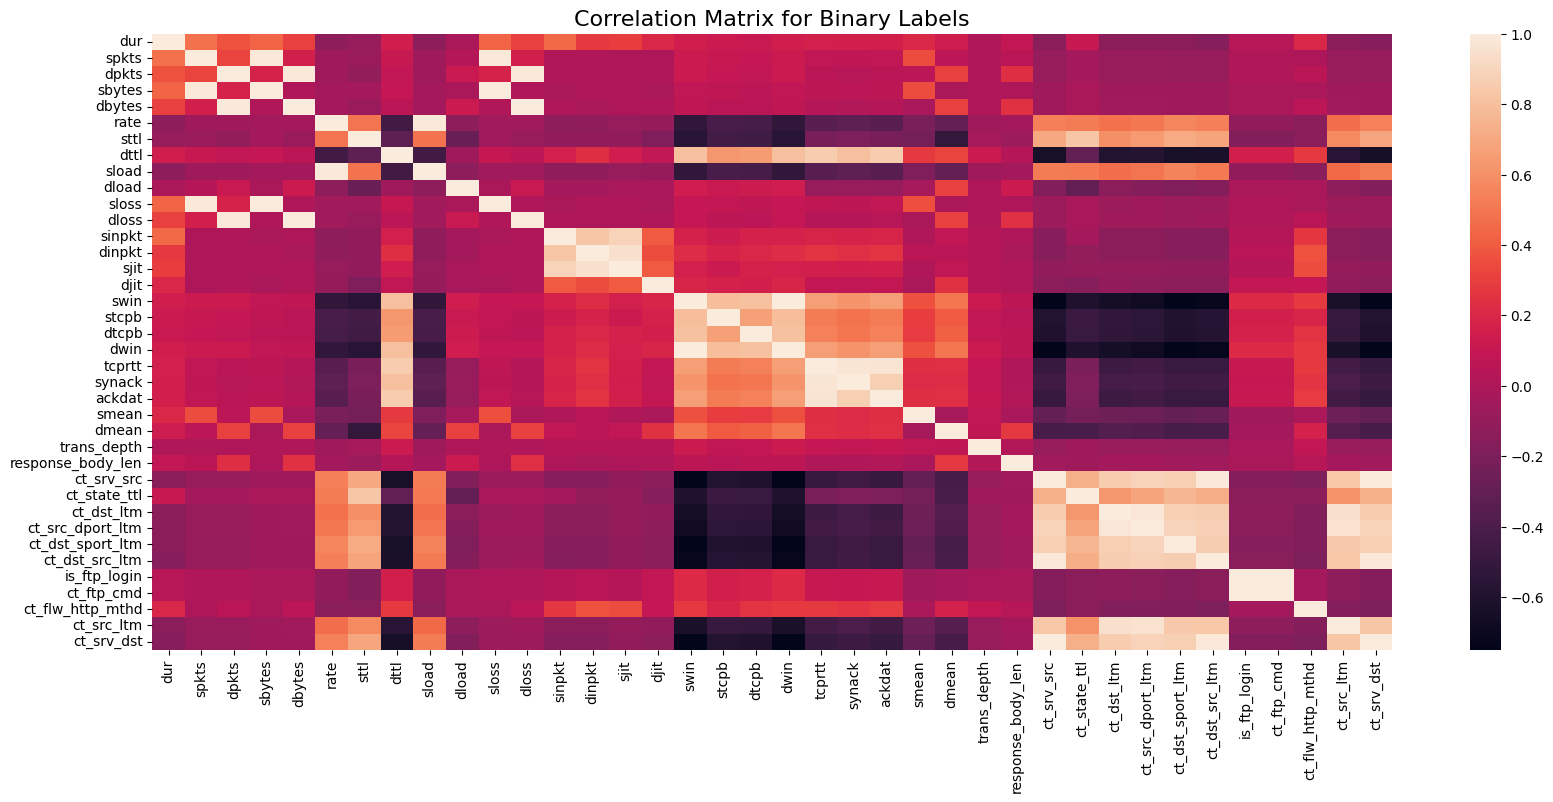

In [266]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr() #tính toán ma trận tương quan giữa các cột số trong bin_data
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
# plt.savefig('plots/correlation_matrix_bin.png')
plt.show()
#màu nhạt  có mối tương quan mạnh,

## **Correlation Matrix for Multi-class Labels**

In [267]:
num_col = list(multi_data.select_dtypes(include='number').columns)
num_col.remove('label')
num_col.remove('is_sm_ips_ports')
num_col.remove('id')

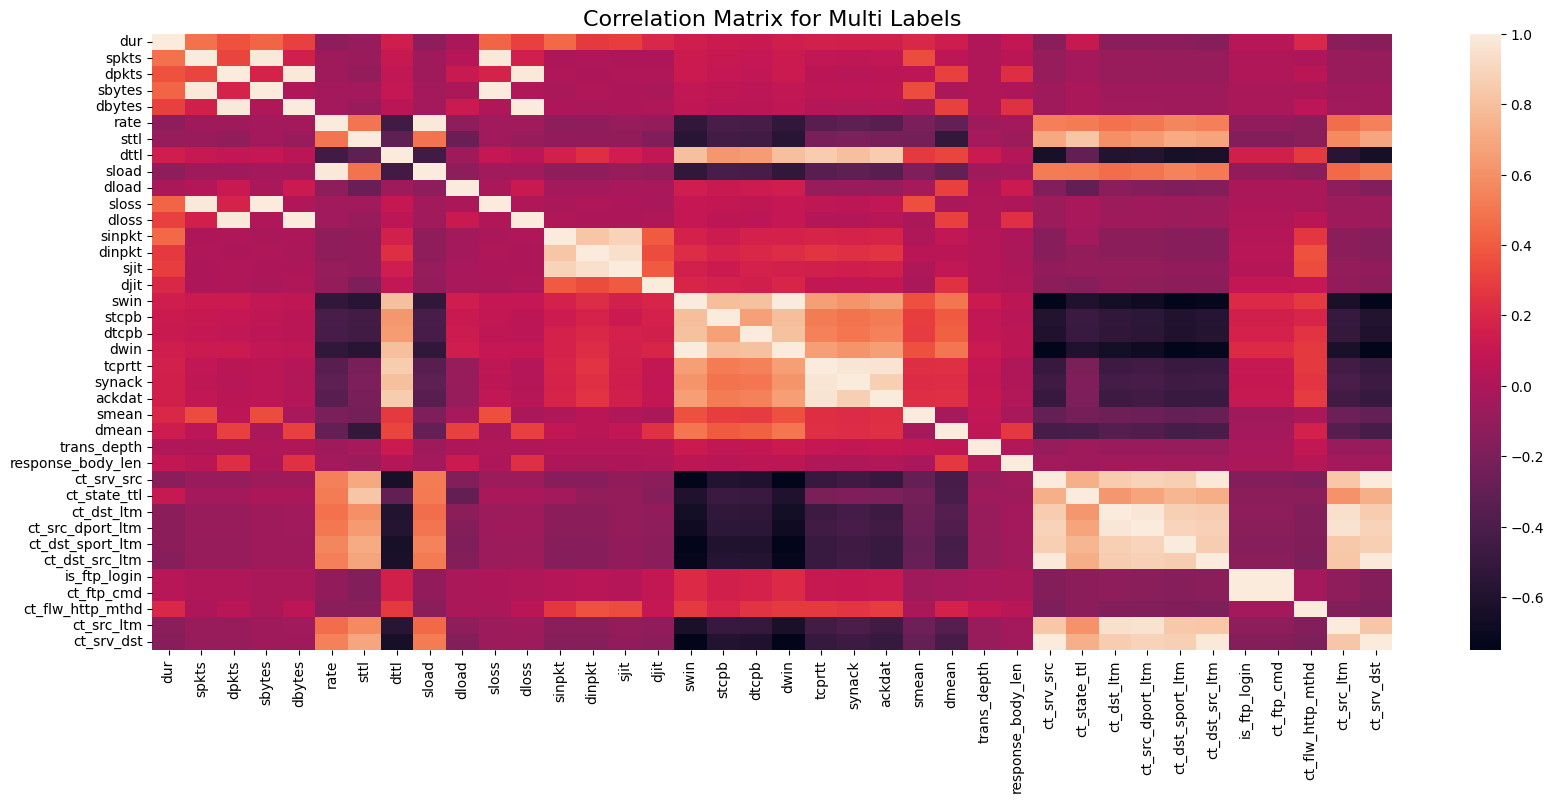

In [268]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
# plt.savefig('plots/correlation_matrix_multi.png')
plt.show()
#Màu Nóng (Đỏ, Cam, Vàng, tiến về 1.0): Biểu thị tương quan dương mạnh
#Nghĩa là khi một biến tăng, biến kia cũng có xu hướng tăng theo 
# (và ngược lại, khi một biến giảm, biến kia cũng giảm).

# **Feature Selection: chọn đặc trưng để train mô hình**

## **Binary Labels**

In [269]:
# “Chọn các đặc trưng có tương quan mạnh nhất với biến mục tiêu (label)
#  để huấn luyện mô hình — giúp giảm nhiễu và tốc độ train.”

## Bro có thể giữ bước này ở mức cơ bản:Giữ top 10 feature có tương quan cao nhất với label.

In [270]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
#chọn đặc trưng dựa trên hệ số tương quan 
#tương quan cao với cột label (tức là biến mục tiêu cần dự đoán, ví dụ như tấn công / không tấn công, spam / không spam,...).
if num_col.count('label') < 1:
  num_col.append('label') #đảm bảo dsach num_col có cột 'label' vì cần label tính tương quan

corr_bin = bin_data[num_col].corr()
#→ Đây là ma trận hệ số Pearson (phạm vi từ -1 đến 1): 1 là tg quan hoàn hảo -1 ngược chiều 0 là 0
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0]
highest_corr_bin.sort_values(ascending=True)

spkts                0.002335
trans_depth          0.005643
dinpkt               0.012691
ct_flw_http_mthd     0.018715
dbytes               0.021921
sloss                0.022441
dloss                0.025828
dur                  0.026755
sbytes               0.027006
dpkts                0.033616
response_body_len    0.041592
sjit                 0.050206
sinpkt               0.050813
is_ftp_login         0.063136
ct_ftp_cmd           0.063136
smean                0.099587
djit                 0.109603
dttl                 0.157985
synack               0.171045
stcpb                0.185278
dtcpb                0.186834
tcprtt               0.193483
ackdat               0.203281
swin                 0.232359
dwin                 0.232359
dmean                0.250504
sload                0.327563
rate                 0.331352
dload                0.340192
ct_src_ltm           0.359787
ct_dst_ltm           0.373195
ct_src_dport_ltm     0.433068
ct_srv_dst           0.447292
ct_dst_src

In [271]:
# highest_corr_bin = highest_corr_bin.drop(highest_corr_bin[highest_corr_bin.index == "sttl"].index)
# highest_corr_bin = highest_corr_bin.drop(highest_corr_bin[highest_corr_bin.index == "dttl"].index)
# highest_corr_bin = highest_corr_bin.drop(highest_corr_bin[highest_corr_bin.index == "ct_state_ttl"].index)
# highest_corr_bin = highest_corr_bin.drop(highest_corr_bin[highest_corr_bin.index == "tcprtt"].index)

In [272]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index

In [273]:
bin_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'label'],
      dtype='object')

In [274]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,label
133349,1.333405e-07,0.000137,0.000000,2.071516e-07,0.000000,0.111111,0.995536,0.000000,0.076968,0.000000,...,0.18,0.18,0.300000,0.18,0.0,0.0,0.000000,0.18,0.18,0
18339,1.751761e-05,0.000137,0.000184,1.864364e-06,0.000011,0.002852,0.000000,0.115079,0.000751,0.027556,...,0.06,0.00,0.000000,0.00,0.0,0.0,0.000000,0.04,0.04,1
170500,6.667027e-08,0.000137,0.000000,2.071516e-07,0.000000,0.200000,0.995536,0.000000,0.138542,0.000000,...,0.48,0.48,0.366667,0.66,0.0,0.0,0.000000,0.48,0.66,0
165830,1.166730e-07,0.000137,0.000000,2.071516e-07,0.000000,0.125000,0.995536,0.000000,0.086589,0.000000,...,0.16,0.16,0.266667,0.16,0.0,0.0,0.000000,0.16,0.16,0
37756,5.689641e-04,0.006995,0.003871,3.871663e-03,0.000233,0.002724,0.000000,0.115079,0.013090,0.034597,...,0.02,0.00,0.000000,0.00,0.0,0.0,0.000000,0.02,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169264,9.923320e-03,0.001234,0.000737,7.623179e-05,0.000185,0.000029,0.138393,1.000000,0.000016,0.001412,...,0.00,0.00,0.000000,0.00,0.0,0.0,0.033333,0.02,0.00,0
98378,6.023542e-03,0.001509,0.002581,8.348209e-05,0.002106,0.000108,0.138393,1.000000,0.000028,0.029149,...,0.00,0.02,0.000000,0.00,0.0,0.0,0.033333,0.02,0.00,0
22233,3.350181e-04,0.006995,0.003871,3.842455e-03,0.000233,0.004627,0.000000,0.115079,0.022064,0.058756,...,0.02,0.00,0.000000,0.06,0.0,0.0,0.000000,0.04,0.00,1
80101,1.132310e-02,0.001509,0.002396,9.984707e-05,0.002051,0.000054,0.138393,1.000000,0.000018,0.015056,...,0.00,0.00,0.000000,0.00,0.0,0.0,0.033333,0.02,0.00,0


### **Saving Prepared Dataset to Disk**

In [275]:
# bin_data.to_csv('/Papi/bin_data.csv')

## **Multi-class Labels**

In [276]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
if num_col.count('label') < 1:
  num_col.append('label')

# corr_bin = bin_data[num_col].corr()
corr_multi = multi_data[num_col].corr()

corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti > 0]
highest_corr_multi.sort_values(ascending=True)

sttl                 0.003143
dbytes               0.019006
djit                 0.023343
response_body_len    0.023615
dloss                0.025515
dpkts                0.039583
trans_depth          0.064221
is_ftp_login         0.080023
ct_ftp_cmd           0.080023
sjit                 0.087513
sbytes               0.091624
spkts                0.092389
sloss                0.096502
sinpkt               0.105879
sload                0.121096
dmean                0.129134
rate                 0.131832
dinpkt               0.154206
ct_state_ttl         0.157678
smean                0.167737
dur                  0.168503
ct_src_dport_ltm     0.173350
dload                0.178640
ct_dst_sport_ltm     0.185607
ct_src_ltm           0.201924
ct_dst_src_ltm       0.203981
ct_srv_src           0.204289
ct_dst_ltm           0.206405
ct_srv_dst           0.209479
ct_flw_http_mthd     0.241945
stcpb                0.286602
dtcpb                0.291339
swin                 0.368898
dwin      

In [277]:
# highest_corr_multi = highest_corr_multi.drop(highest_corr_multi[highest_corr_multi.index == "sttl"].index)
# highest_corr_multi = highest_corr_multi.drop(highest_corr_multi[highest_corr_multi.index == "dttl"].index)
# highest_corr_multi = highest_corr_multi.drop(highest_corr_multi[highest_corr_multi.index == "ct_state_ttl"].index)
# highest_corr_multi = highest_corr_multi.drop(highest_corr_multi[highest_corr_multi.index == "tcprtt"].index)

In [278]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'label'],
      dtype='object')

In [279]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

### **Saving Prepared Dataset to Disk**

In [280]:
# multi_data.to_csv('./datasets/multi_data.csv')

# **BINARY CLASSIFICATION: TRAIN mô hình**

## **Data Splitting**



In [281]:
# features_to_exclude = ['sload', 'dload', 'ct_dst_ltm']

In [282]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [283]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

## **Linear Regression pass**

In [284]:

lr_bin = LinearRegression()

from datetime import datetime
start = datetime.now()
lr_bin.fit(X_train, y_train)
end = datetime.now()
lr_trainTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 56530.0 µs


In [285]:
from datetime import datetime
start = datetime.now()
y_pred = lr_bin.predict(X_test)
end = datetime.now()
lr_inferTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 5000.0 µs


In [286]:
round = lambda x:1 if x>0.6 else 0
vfunc = np.vectorize(round)
y_pred = vfunc(y_pred)

In [287]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.024918743228602384
Mean Squared Error -  0.024918743228602384
Root Mean Squared Error -  0.1578567174009468
R2 Score -  85.79062424095216
Accuracy -  97.50812567713976


In [288]:
original_accuracy = accuracy_score(y_test, y_pred)
accuracy_drop = {}

for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = lr_bin.predict(X_test_modified)
    y_pred_modified_adjusted = np.maximum(0, y_pred_modified)
    y_pred_binary_modified = (y_pred_modified_adjusted > 0.6).astype(int)
    new_accuracy = accuracy_score(y_test, y_pred_binary_modified)
    drop = original_accuracy - new_accuracy
    # if drop > 0:
    #     accuracy_drop[feature] = drop
    accuracy_drop[feature] = drop
for feature, drop in sorted(accuracy_drop.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: Accuracy Drop = {drop}")

ct_state_ttl: Accuracy Drop = 0.4994582881906825
dttl: Accuracy Drop = 0.08342361863488623
dloss: Accuracy Drop = 0.02058504875406275
dpkts: Accuracy Drop = 0.013001083423618609
sloss: Accuracy Drop = 0.005417118093174356
dbytes: Accuracy Drop = 0.004333694474539462
spkts: Accuracy Drop = 0.003250270855904569
sjit: Accuracy Drop = 0.003250270855904569
ackdat: Accuracy Drop = 0.0021668472372696757
sbytes: Accuracy Drop = 0.0
rate: Accuracy Drop = 0.0
sttl: Accuracy Drop = 0.0
sload: Accuracy Drop = 0.0
dload: Accuracy Drop = 0.0
djit: Accuracy Drop = 0.0
swin: Accuracy Drop = 0.0
stcpb: Accuracy Drop = 0.0
dtcpb: Accuracy Drop = 0.0
dwin: Accuracy Drop = 0.0
tcprtt: Accuracy Drop = 0.0
synack: Accuracy Drop = 0.0
smean: Accuracy Drop = 0.0
dmean: Accuracy Drop = 0.0
trans_depth: Accuracy Drop = 0.0
response_body_len: Accuracy Drop = 0.0
ct_srv_src: Accuracy Drop = 0.0
ct_dst_ltm: Accuracy Drop = 0.0
ct_src_dport_ltm: Accuracy Drop = 0.0
ct_dst_sport_ltm: Accuracy Drop = 0.0
ct_dst_src_l

In [289]:
accuracy_drop_lr_sorted = sorted(accuracy_drop.items(), key=lambda x: x[0], reverse=False)
# accuracy_drop_lr_sorted

In [290]:
X_test_modified_ct_state_ttl = X_test.copy()
X_test_modified_ct_state_ttl['ct_state_ttl'] = 0
y_pred_modified_ct_state_ttl = lr_bin.predict(X_test_modified_ct_state_ttl)
y_pred_binary_modified_ct_state_ttl = (np.maximum(0, y_pred_modified_ct_state_ttl) > 0.6).astype(int)
new_accuracy_ct_state_ttl = accuracy_score(y_test, y_pred_binary_modified_ct_state_ttl)
drop_ct_state_ttl = original_accuracy - new_accuracy_ct_state_ttl

In [291]:
X_test_modified_ct_dst_src_ltm = X_test.copy()
X_test_modified_ct_dst_src_ltm['ct_dst_src_ltm'] = 0
y_pred_modified_ct_dst_src_ltm = lr_bin.predict(X_test_modified_ct_dst_src_ltm)
y_pred_binary_modified_ct_dst_src_ltm = (np.maximum(0, y_pred_modified_ct_dst_src_ltm) > 0.6).astype(int)
new_accuracy_ct_dst_src_ltm = accuracy_score(y_test, y_pred_binary_modified_ct_dst_src_ltm)
drop_ct_dst_src_ltm = original_accuracy - new_accuracy_ct_dst_src_ltm

In [292]:
print(f"Original Accuracy: {original_accuracy}")
print(f"Accuracy after masking 'ct_state_ttl': {new_accuracy_ct_state_ttl} (Drop: {drop_ct_state_ttl})")
print(f"Accuracy after masking 'ct_dst_src_ltm': {new_accuracy_ct_dst_src_ltm} (Drop: {drop_ct_dst_src_ltm})")


Original Accuracy: 0.9750812567713976
Accuracy after masking 'ct_state_ttl': 0.47562296858071507 (Drop: 0.4994582881906825)
Accuracy after masking 'ct_dst_src_ltm': 0.9750812567713976 (Drop: 0.0)


In [293]:
X_test_modified_both = X_test.copy()

In [294]:
X_test_modified_both['ct_state_ttl'] = 0
X_test_modified_both['ct_dst_src_ltm'] = 0
y_pred_modified_both = lr_bin.predict(X_test_modified_both)
y_pred_binary_modified_both = (np.maximum(0, y_pred_modified_both) > 0.6).astype(int)
new_accuracy_both = accuracy_score(y_test, y_pred_binary_modified_both)

# Calculate the accuracy drop when both features are masked
drop_both = original_accuracy - new_accuracy_both
print(f"Original Accuracy: {original_accuracy}")
print(f"Accuracy after masking 'ct_state_ttl' and 'ct_dst_src_ltm' together: {new_accuracy_both} (Drop: {drop_both})")


Original Accuracy: 0.9750812567713976
Accuracy after masking 'ct_state_ttl' and 'ct_dst_src_ltm' together: 0.47562296858071507 (Drop: 0.4994582881906825)


In [295]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)

In [296]:
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.98       716
      normal       0.97      0.91      0.94       207

    accuracy                           0.98       923
   macro avg       0.97      0.95      0.96       923
weighted avg       0.98      0.98      0.97       923



### **Saving Trained Model to Disk**

In [297]:
# pkl_filename = "./models/linear_regressor_binary.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(lr_bin, file)
#   print("Saved model to disk")
# else:
#   print("Previous Model exists on the disk! Please Remove")

## **Logistic Regression PASS**

In [298]:
logr_bin = LogisticRegression(random_state=123, max_iter=5000)
logr_bin

LogisticRegression(max_iter=5000, random_state=123)

In [299]:

from datetime import datetime
start = datetime.now()
logr_bin.fit(X_train,y_train)
end = datetime.now()
lgr_trainTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 69541.0 µs


In [300]:

from datetime import datetime
start = datetime.now()
y_pred1 = logr_bin.predict(X_test)
end = datetime.now()
lgr_inferTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 2993.0 µs


In [301]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred1)*100)

Mean Absolute Error -  0.024918743228602384
Mean Squared Error -  0.024918743228602384
Root Mean Squared Error -  0.1578567174009468
R2 Score -  85.79062424095216
Accuracy -  97.94149512459371


In [302]:
original_accuracy_logr = accuracy_score(y_test, y_pred1)
print(f"Original Accuracy: {original_accuracy_logr*100:.5f}%")
accuracy_drop_logr = {}
for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = logr_bin.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop_logr[feature] = original_accuracy_logr - new_accuracy
print("\nOcclusion Sensitivity Analysis (Logistic Regression):")
# positive_including_zero_accuracy_drop_logr = {feature: drop for feature, drop in accuracy_drop_logr.items() if drop >= 0}
positive_including_zero_accuracy_drop_logr = {feature: drop for feature, drop in accuracy_drop_logr.items()}

for feature, drop in sorted(positive_including_zero_accuracy_drop_logr.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: Accuracy Drop = {drop:.4f}")

Original Accuracy: 97.94150%

Occlusion Sensitivity Analysis (Logistic Regression):
dttl: Accuracy Drop = 0.2524
sttl: Accuracy Drop = 0.0108
ct_state_ttl: Accuracy Drop = 0.0108
dur: Accuracy Drop = 0.0000
spkts: Accuracy Drop = 0.0000
dpkts: Accuracy Drop = 0.0000
sbytes: Accuracy Drop = 0.0000
dbytes: Accuracy Drop = 0.0000
rate: Accuracy Drop = 0.0000
sload: Accuracy Drop = 0.0000
dload: Accuracy Drop = 0.0000
sloss: Accuracy Drop = 0.0000
dloss: Accuracy Drop = 0.0000
sinpkt: Accuracy Drop = 0.0000
dinpkt: Accuracy Drop = 0.0000
sjit: Accuracy Drop = 0.0000
djit: Accuracy Drop = 0.0000
swin: Accuracy Drop = 0.0000
stcpb: Accuracy Drop = 0.0000
dtcpb: Accuracy Drop = 0.0000
dwin: Accuracy Drop = 0.0000
tcprtt: Accuracy Drop = 0.0000
synack: Accuracy Drop = 0.0000
ackdat: Accuracy Drop = 0.0000
smean: Accuracy Drop = 0.0000
dmean: Accuracy Drop = 0.0000
trans_depth: Accuracy Drop = 0.0000
response_body_len: Accuracy Drop = 0.0000
ct_srv_src: Accuracy Drop = 0.0000
ct_dst_ltm: Accura

In [303]:
positive_including_zero_accuracy_drop_logr_sorted = sorted(positive_including_zero_accuracy_drop_logr.items(), key=lambda x: x[0], reverse=False)

In [304]:
len(positive_including_zero_accuracy_drop_logr_sorted)

38

In [305]:
X_test_modified_both = X_test.copy()
X_test_modified_both['ct_state_ttl'] = 0
X_test_modified_both['ct_dst_src_ltm'] = 0
y_pred_modified_both = logr_bin.predict(X_test_modified_both)
new_accuracy_both = accuracy_score(y_test, y_pred_modified_both)
drop_both = original_accuracy_logr - new_accuracy_both
print(f"Original Accuracy: {original_accuracy_logr*100:.5f}%")
print(f"Accuracy after masking 'ct_state_ttl' and 'ct_dst_src_ltm' together: {new_accuracy_both*100:.5f}% (Drop: {drop_both*100:.5f}%)")

Original Accuracy: 97.94150%
Accuracy after masking 'ct_state_ttl' and 'ct_dst_src_ltm' together: 96.85807% (Drop: 1.08342%)


In [306]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.98       716
      normal       0.97      0.91      0.94       207

    accuracy                           0.98       923
   macro avg       0.97      0.95      0.96       923
weighted avg       0.98      0.98      0.97       923



### **Saving Trained Model to Disk**

In [307]:
# pkl_filename = "./models/logistic_regressor_binary.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(logr_bin, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## **PASSLinear Support Vector Machine**

In [308]:
lsvm_bin = SVC(kernel='linear',gamma='auto')

from datetime import datetime
start = datetime.now()
lsvm_bin.fit(X_train,y_train)
end = datetime.now()
lsvm_trainTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 158442.0 µs


In [309]:
from datetime import datetime
start = datetime.now()
y_pred2 = lsvm_bin.predict(X_test)
end = datetime.now()
lsvm_inferTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 10002.0 µs


In [310]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred2)*100)

Mean Absolute Error -  0.024918743228602384
Mean Squared Error -  0.024918743228602384
Root Mean Squared Error -  0.1578567174009468
R2 Score -  85.79062424095216
Accuracy -  97.94149512459371


In [311]:
original_accuracy_lsvm = accuracy_score(y_test, y_pred2)
print(f"Original Accuracy: {original_accuracy_lsvm*100:.5f}%")
accuracy_drop_lsvm = {}
for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = lsvm_bin.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop_lsvm[feature] = original_accuracy_lsvm - new_accuracy
print("\nOcclusion Sensitivity Analysis (Linear SVM):")
for feature, drop in sorted(accuracy_drop_lsvm.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: Accuracy Drop = {drop:.4f}")

Original Accuracy: 97.94150%

Occlusion Sensitivity Analysis (Linear SVM):
ct_state_ttl: Accuracy Drop = 0.4800
dttl: Accuracy Drop = 0.2514
dur: Accuracy Drop = 0.0000
spkts: Accuracy Drop = 0.0000
dpkts: Accuracy Drop = 0.0000
sbytes: Accuracy Drop = 0.0000
dbytes: Accuracy Drop = 0.0000
rate: Accuracy Drop = 0.0000
sttl: Accuracy Drop = 0.0000
sload: Accuracy Drop = 0.0000
dload: Accuracy Drop = 0.0000
sloss: Accuracy Drop = 0.0000
dloss: Accuracy Drop = 0.0000
sinpkt: Accuracy Drop = 0.0000
dinpkt: Accuracy Drop = 0.0000
sjit: Accuracy Drop = 0.0000
djit: Accuracy Drop = 0.0000
swin: Accuracy Drop = 0.0000
stcpb: Accuracy Drop = 0.0000
dtcpb: Accuracy Drop = 0.0000
dwin: Accuracy Drop = 0.0000
tcprtt: Accuracy Drop = 0.0000
synack: Accuracy Drop = 0.0000
ackdat: Accuracy Drop = 0.0000
smean: Accuracy Drop = 0.0000
dmean: Accuracy Drop = 0.0000
trans_depth: Accuracy Drop = 0.0000
response_body_len: Accuracy Drop = 0.0000
ct_srv_src: Accuracy Drop = 0.0000
ct_dst_ltm: Accuracy Drop =

In [312]:
accuracy_drop_lsvm_sorted = sorted(accuracy_drop_lsvm.items(), key=lambda x: x[0], reverse=False)
accuracy_drop_lsvm_sorted

[('ackdat', 0.0),
 ('ct_dst_ltm', 0.0),
 ('ct_dst_sport_ltm', 0.0),
 ('ct_dst_src_ltm', 0.0),
 ('ct_flw_http_mthd', 0.0),
 ('ct_ftp_cmd', 0.0),
 ('ct_src_dport_ltm', 0.0),
 ('ct_src_ltm', 0.0),
 ('ct_srv_dst', 0.0),
 ('ct_srv_src', 0.0),
 ('ct_state_ttl', 0.4799566630552546),
 ('dbytes', 0.0),
 ('dinpkt', 0.0),
 ('djit', 0.0),
 ('dload', 0.0),
 ('dloss', 0.0),
 ('dmean', 0.0),
 ('dpkts', 0.0),
 ('dtcpb', 0.0),
 ('dttl', 0.2513542795232936),
 ('dur', 0.0),
 ('dwin', 0.0),
 ('is_ftp_login', 0.0),
 ('rate', 0.0),
 ('response_body_len', 0.0),
 ('sbytes', 0.0),
 ('sinpkt', 0.0),
 ('sjit', 0.0),
 ('sload', 0.0),
 ('sloss', 0.0),
 ('smean', 0.0),
 ('spkts', 0.0),
 ('stcpb', 0.0),
 ('sttl', 0.0),
 ('swin', 0.0),
 ('synack', 0.0),
 ('tcprtt', 0.0),
 ('trans_depth', 0.0)]

In [313]:
X_test_modified = X_test.copy()
X_test_modified['ct_state_ttl'] = 0
y_pred_modified = lsvm_bin.predict(X_test_modified)
new_accuracy = accuracy_score(y_test, y_pred_modified)
drop = original_accuracy_lsvm - new_accuracy
print(f"Original Accuracy: {original_accuracy_lsvm*100:.5f}%")
print(f"Accuracy after masking 'ct_state_ttl': {new_accuracy*100:.5f}% (Drop: {drop*100:.5f}%)")

Original Accuracy: 97.94150%
Accuracy after masking 'ct_state_ttl': 49.94583% (Drop: 47.99567%)


In [314]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.98       716
      normal       0.97      0.91      0.94       207

    accuracy                           0.98       923
   macro avg       0.97      0.95      0.96       923
weighted avg       0.98      0.98      0.97       923



### **Saving Trained Model to Disk**

In [315]:
# pkl_filename = "./models/lsvm_binary.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(lsvm_bin, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## **PASSK Nearest Neighbor Classifier**

In [316]:
knn_bin=KNeighborsClassifier(n_neighbors=5)

from datetime import datetime
start = datetime.now()
knn_bin.fit(X_train,y_train)
end = datetime.now()
knn_trainTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 5006.0 µs


In [317]:
from datetime import datetime
start = datetime.now()
y_pred3 = knn_bin.predict(X_test)
end = datetime.now()
knn_inferTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 147054.0 µs


In [318]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred3)*100)

Mean Absolute Error -  0.024918743228602384
Mean Squared Error -  0.024918743228602384
Root Mean Squared Error -  0.1578567174009468
R2 Score -  85.79062424095216
Accuracy -  97.72481040086673


In [319]:
original_accuracy_knn = accuracy_score(y_test, y_pred3)
print(f"Original Accuracy: {original_accuracy_knn*100:.5f}%")
accuracy_drop_knn = {}
for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = knn_bin.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop_knn[feature] = original_accuracy_knn - new_accuracy
print("\nOcclusion Sensitivity Analysis (KNN Classifier):")
for feature, drop in sorted(accuracy_drop_knn.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: Accuracy Drop = {drop:.4f}")

Original Accuracy: 97.72481%

Occlusion Sensitivity Analysis (KNN Classifier):
dttl: Accuracy Drop = 0.1538
sttl: Accuracy Drop = 0.0986
dmean: Accuracy Drop = 0.0043
dur: Accuracy Drop = 0.0022
dtcpb: Accuracy Drop = 0.0011
ackdat: Accuracy Drop = 0.0011
is_ftp_login: Accuracy Drop = 0.0011
ct_ftp_cmd: Accuracy Drop = 0.0011
spkts: Accuracy Drop = 0.0000
dpkts: Accuracy Drop = 0.0000
sbytes: Accuracy Drop = 0.0000
dbytes: Accuracy Drop = 0.0000
rate: Accuracy Drop = 0.0000
sload: Accuracy Drop = 0.0000
dload: Accuracy Drop = 0.0000
sloss: Accuracy Drop = 0.0000
dloss: Accuracy Drop = 0.0000
sinpkt: Accuracy Drop = 0.0000
dinpkt: Accuracy Drop = 0.0000
sjit: Accuracy Drop = 0.0000
djit: Accuracy Drop = 0.0000
swin: Accuracy Drop = 0.0000
dwin: Accuracy Drop = 0.0000
trans_depth: Accuracy Drop = 0.0000
response_body_len: Accuracy Drop = 0.0000
ct_srv_src: Accuracy Drop = 0.0000
ct_state_ttl: Accuracy Drop = 0.0000
ct_dst_ltm: Accuracy Drop = 0.0000
ct_src_dport_ltm: Accuracy Drop = 0.00

In [320]:
accuracy_drop_knn_sorted = sorted(accuracy_drop_knn.items(), key=lambda x: x[0], reverse=False)
accuracy_drop_knn_sorted

[('ackdat', 0.0010834236186348933),
 ('ct_dst_ltm', 0.0),
 ('ct_dst_sport_ltm', 0.0),
 ('ct_dst_src_ltm', 0.0),
 ('ct_flw_http_mthd', -0.0010834236186348933),
 ('ct_ftp_cmd', 0.0010834236186348933),
 ('ct_src_dport_ltm', 0.0),
 ('ct_src_ltm', 0.0),
 ('ct_srv_dst', 0.0),
 ('ct_srv_src', 0.0),
 ('ct_state_ttl', 0.0),
 ('dbytes', 0.0),
 ('dinpkt', 0.0),
 ('djit', 0.0),
 ('dload', 0.0),
 ('dloss', 0.0),
 ('dmean', 0.004333694474539462),
 ('dpkts', 0.0),
 ('dtcpb', 0.0010834236186348933),
 ('dttl', 0.15384615384615385),
 ('dur', 0.0021668472372697867),
 ('dwin', 0.0),
 ('is_ftp_login', 0.0010834236186348933),
 ('rate', 0.0),
 ('response_body_len', 0.0),
 ('sbytes', 0.0),
 ('sinpkt', 0.0),
 ('sjit', 0.0),
 ('sload', 0.0),
 ('sloss', 0.0),
 ('smean', -0.0010834236186348933),
 ('spkts', 0.0),
 ('stcpb', -0.0010834236186348933),
 ('sttl', 0.09859154929577463),
 ('swin', 0.0),
 ('synack', -0.004333694474539573),
 ('tcprtt', -0.0021668472372697867),
 ('trans_depth', 0.0)]

In [321]:
X_test_modified_both = X_test.copy()
X_test_modified_both['ct_state_ttl'] = 0
X_test_modified_both['sttl'] = 0
y_pred_modified_both = knn_bin.predict(X_test_modified_both)
new_accuracy_both = accuracy_score(y_test, y_pred_modified_both)
drop_both = original_accuracy_knn - new_accuracy_both
print(f"Original Accuracy: {original_accuracy_knn*100:.5f}%")
print(f"Accuracy after masking 'ct_state_ttl' and 'sttl' together: {new_accuracy_both*100:.5f}% (Drop: {drop_both*100:.5f}%)")


Original Accuracy: 97.72481%
Accuracy after masking 'ct_state_ttl' and 'sttl' together: 69.44745% (Drop: 28.27736%)


In [322]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.98       716
      normal       0.97      0.91      0.94       207

    accuracy                           0.98       923
   macro avg       0.97      0.95      0.96       923
weighted avg       0.98      0.98      0.97       923



### **Saving Trained Model to Disk**

In [323]:
# pkl_filename = "./models/knn_binary.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(knn_bin, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## **NEEDRandom Forest Classifier**

In [324]:
rf_bin = RandomForestClassifier(random_state=123)

from datetime import datetime
start = datetime.now()
rf_bin.fit(X_train,y_train)
end = datetime.now()
rf_trainTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 980315.0 µs


In [325]:
from datetime import datetime
start = datetime.now()
y_pred4 = rf_bin.predict(X_test)
end = datetime.now()
rf_inferTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 24658.0 µs


In [326]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred4)*100)

Mean Absolute Error -  0.024918743228602384
Mean Squared Error -  0.024918743228602384
Root Mean Squared Error -  0.1578567174009468
R2 Score -  85.79062424095216
Accuracy -  97.50812567713976


In [327]:
original_accuracy_rf = accuracy_score(y_test, y_pred4)
print(f"Original Accuracy: {original_accuracy_rf*100:.5f}%")
accuracy_drop_rf = {}
for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = rf_bin.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop_rf[feature] = original_accuracy_rf - new_accuracy
print("\nOcclusion Sensitivity Analysis (Random Forest Classifier):")
for feature, drop in sorted(accuracy_drop_rf.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: Accuracy Drop = {drop:.4f}")

Original Accuracy: 97.50813%

Occlusion Sensitivity Analysis (Random Forest Classifier):
sbytes: Accuracy Drop = 0.0000
rate: Accuracy Drop = 0.0000
sloss: Accuracy Drop = 0.0000
djit: Accuracy Drop = 0.0000
stcpb: Accuracy Drop = 0.0000
dwin: Accuracy Drop = 0.0000
tcprtt: Accuracy Drop = 0.0000
smean: Accuracy Drop = 0.0000
trans_depth: Accuracy Drop = 0.0000
response_body_len: Accuracy Drop = 0.0000
ct_dst_ltm: Accuracy Drop = 0.0000
ct_src_dport_ltm: Accuracy Drop = 0.0000
ct_dst_sport_ltm: Accuracy Drop = 0.0000
is_ftp_login: Accuracy Drop = 0.0000
ct_ftp_cmd: Accuracy Drop = 0.0000
ct_flw_http_mthd: Accuracy Drop = 0.0000
spkts: Accuracy Drop = -0.0011
dttl: Accuracy Drop = -0.0011
sload: Accuracy Drop = -0.0011
sinpkt: Accuracy Drop = -0.0011
sjit: Accuracy Drop = -0.0011
swin: Accuracy Drop = -0.0011
dtcpb: Accuracy Drop = -0.0011
synack: Accuracy Drop = -0.0011
ackdat: Accuracy Drop = -0.0011
ct_src_ltm: Accuracy Drop = -0.0011
dur: Accuracy Drop = -0.0022
dpkts: Accuracy Drop

In [328]:
accuracy_drop_rf_sorted = sorted(accuracy_drop_rf.items(), key=lambda x: x[0], reverse=False)
accuracy_drop_rf_sorted

[('ackdat', -0.0010834236186348933),
 ('ct_dst_ltm', 0.0),
 ('ct_dst_sport_ltm', 0.0),
 ('ct_dst_src_ltm', -0.0021668472372697867),
 ('ct_flw_http_mthd', 0.0),
 ('ct_ftp_cmd', 0.0),
 ('ct_src_dport_ltm', 0.0),
 ('ct_src_ltm', -0.0010834236186348933),
 ('ct_srv_dst', -0.00325027085590468),
 ('ct_srv_src', -0.0021668472372697867),
 ('ct_state_ttl', -0.004333694474539573),
 ('dbytes', -0.004333694474539573),
 ('dinpkt', -0.0021668472372697867),
 ('djit', 0.0),
 ('dload', -0.0021668472372697867),
 ('dloss', -0.0021668472372697867),
 ('dmean', -0.00325027085590468),
 ('dpkts', -0.0021668472372697867),
 ('dtcpb', -0.0010834236186348933),
 ('dttl', -0.0010834236186348933),
 ('dur', -0.0021668472372697867),
 ('dwin', 0.0),
 ('is_ftp_login', 0.0),
 ('rate', 0.0),
 ('response_body_len', 0.0),
 ('sbytes', 0.0),
 ('sinpkt', -0.0010834236186348933),
 ('sjit', -0.0010834236186348933),
 ('sload', -0.0010834236186348933),
 ('sloss', 0.0),
 ('smean', 0.0),
 ('spkts', -0.0010834236186348933),
 ('stcpb',

In [329]:
original_accuracy_rf

0.9750812567713976

In [330]:
X_test_modified_both = X_test.copy()
X_test_modified_both['sttl'] = 0
X_test_modified_both['ct_srv_src'] = 0
y_pred_modified_both = rf_bin.predict(X_test_modified_both)
new_accuracy_both = accuracy_score(y_test, y_pred_modified_both)
drop_both = original_accuracy_rf - new_accuracy_both
print(f"Original Accuracy: {original_accuracy_rf*100:.5f}%")
print(f"Accuracy after masking 'sttl' and 'ct_srv_src' together: {new_accuracy_both*100:.5f}% (Drop: {drop_both*100:.5f}%)")

Original Accuracy: 97.50813%
Accuracy after masking 'sttl' and 'ct_srv_src' together: 97.50813% (Drop: 0.00000%)


In [331]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.98       716
      normal       0.97      0.91      0.94       207

    accuracy                           0.98       923
   macro avg       0.97      0.95      0.96       923
weighted avg       0.98      0.98      0.97       923



### **Saving Trained Model to Disk**

In [332]:
# pkl_filename = "./models/random_forest_binary.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(rf_bin, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## **NEEDDecision Tree Classifier**

In [333]:
dt_bin = DecisionTreeClassifier(random_state=123)

from datetime import datetime
start = datetime.now()
dt_bin.fit(X_train,y_train)
end = datetime.now()
dt_trainTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 72532.0 µs


In [334]:
y_pred5 = dt_bin.predict(X_test)

from datetime import datetime
start = datetime.now()
y_pred5 = dt_bin.predict(X_test)
end = datetime.now()
dt_inferTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 2001.0000000000002 µs


In [335]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred5)*100)

Mean Absolute Error -  0.024918743228602384
Mean Squared Error -  0.024918743228602384
Root Mean Squared Error -  0.1578567174009468
R2 Score -  85.79062424095216
Accuracy -  96.53304442036837


In [336]:
##Occlusion Sensitivity Analysis

In [337]:
original_accuracy_dt = accuracy_score(y_test, y_pred5)
print(f"Original Accuracy: {original_accuracy_dt*100:.5f}%")
accuracy_drop_dt = {}
for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = dt_bin.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop_dt[feature] = original_accuracy_dt - new_accuracy
print("\nOcclusion Sensitivity Analysis (Decision Tree Classifier):")
for feature, drop in sorted(accuracy_drop_dt.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: Accuracy Drop = {drop:.4f}")

Original Accuracy: 96.53304%

Occlusion Sensitivity Analysis (Decision Tree Classifier):
ct_state_ttl: Accuracy Drop = 0.1495
dbytes: Accuracy Drop = 0.0553
stcpb: Accuracy Drop = 0.0119
sbytes: Accuracy Drop = 0.0098
dur: Accuracy Drop = 0.0043
tcprtt: Accuracy Drop = 0.0043
dtcpb: Accuracy Drop = 0.0033
dmean: Accuracy Drop = 0.0022
response_body_len: Accuracy Drop = 0.0022
dinpkt: Accuracy Drop = 0.0011
spkts: Accuracy Drop = 0.0000
dpkts: Accuracy Drop = 0.0000
rate: Accuracy Drop = 0.0000
sttl: Accuracy Drop = 0.0000
dttl: Accuracy Drop = 0.0000
sload: Accuracy Drop = 0.0000
dload: Accuracy Drop = 0.0000
sloss: Accuracy Drop = 0.0000
dloss: Accuracy Drop = 0.0000
sinpkt: Accuracy Drop = 0.0000
sjit: Accuracy Drop = 0.0000
djit: Accuracy Drop = 0.0000
swin: Accuracy Drop = 0.0000
dwin: Accuracy Drop = 0.0000
smean: Accuracy Drop = 0.0000
trans_depth: Accuracy Drop = 0.0000
ct_srv_src: Accuracy Drop = 0.0000
ct_dst_ltm: Accuracy Drop = 0.0000
ct_src_dport_ltm: Accuracy Drop = 0.0000

In [338]:
accuracy_drop_dt_sorted = sorted(accuracy_drop_dt.items(), key=lambda x: x[0], reverse=False)
accuracy_drop_dt_sorted

[('ackdat', -0.004333694474539573),
 ('ct_dst_ltm', 0.0),
 ('ct_dst_sport_ltm', 0.0),
 ('ct_dst_src_ltm', -0.0010834236186348933),
 ('ct_flw_http_mthd', 0.0),
 ('ct_ftp_cmd', 0.0),
 ('ct_src_dport_ltm', 0.0),
 ('ct_src_ltm', 0.0),
 ('ct_srv_dst', -0.00325027085590468),
 ('ct_srv_src', 0.0),
 ('ct_state_ttl', 0.14951245937161428),
 ('dbytes', 0.05525460455037923),
 ('dinpkt', 0.0010834236186348933),
 ('djit', 0.0),
 ('dload', 0.0),
 ('dloss', 0.0),
 ('dmean', 0.0021668472372697867),
 ('dpkts', 0.0),
 ('dtcpb', 0.00325027085590468),
 ('dttl', 0.0),
 ('dur', 0.004333694474539573),
 ('dwin', 0.0),
 ('is_ftp_login', 0.0),
 ('rate', 0.0),
 ('response_body_len', 0.0021668472372697867),
 ('sbytes', 0.009750812567713929),
 ('sinpkt', 0.0),
 ('sjit', 0.0),
 ('sload', 0.0),
 ('sloss', 0.0),
 ('smean', 0.0),
 ('spkts', 0.0),
 ('stcpb', 0.011917659804983716),
 ('sttl', 0.0),
 ('swin', 0.0),
 ('synack', -0.008667388949079147),
 ('tcprtt', 0.004333694474539573),
 ('trans_depth', 0.0)]

In [339]:
X_test_modified_both = X_test.copy()
X_test_modified_both['sttl'] = 0
X_test_modified_both['rate'] = 0
y_pred_modified_both = dt_bin.predict(X_test_modified_both)
new_accuracy_both = accuracy_score(y_test, y_pred_modified_both)
drop_both = original_accuracy_dt - new_accuracy_both
print(f"Original Accuracy: {original_accuracy_dt*100:.5f}%")
print(f"Accuracy after masking 'sttl' and 'rate' together: {new_accuracy_both*100:.5f}% (Drop: {drop_both*100:.5f}%)")

Original Accuracy: 96.53304%
Accuracy after masking 'sttl' and 'rate' together: 96.53304% (Drop: 0.00000%)


In [340]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.98       716
      normal       0.97      0.91      0.94       207

    accuracy                           0.98       923
   macro avg       0.97      0.95      0.96       923
weighted avg       0.98      0.98      0.97       923



### **Saving Trained Model to Disk**

In [341]:
# pkl_filename = "./models/decision_tree_binary.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(dt_bin, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## **PASSMulti Layer Perceptron**

In [342]:
mlp_bin = MLPClassifier(random_state=123, solver='adam', max_iter=8000)

In [343]:

from datetime import datetime
start = datetime.now()
mlp_bin.fit(X_train,y_train)
end = datetime.now()
mlp_trainTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 11662514.0 µs


In [344]:
from datetime import datetime
start = datetime.now()
y_pred6 = mlp_bin.predict(X_test)
end = datetime.now()
mlp_inferTime_bin = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 6003.0 µs


In [345]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred6)*100)

Mean Absolute Error -  0.024918743228602384
Mean Squared Error -  0.024918743228602384
Root Mean Squared Error -  0.1578567174009468
R2 Score -  85.79062424095216
Accuracy -  98.0498374864572


In [346]:
original_accuracy_mlp = accuracy_score(y_test, y_pred6)
print(f"Original Accuracy: {original_accuracy_mlp*100:.5f}%")

accuracy_drop_mlp = {}
for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = mlp_bin.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop_mlp[feature] = original_accuracy_mlp - new_accuracy
print("\nAdjusted Occlusion Sensitivity Analysis (MLP Classifier):")
for feature, drop in sorted(accuracy_drop_mlp.items(), key=lambda x: x[1], reverse=True):
    if drop >= 0:
        print(f"{feature}: Accuracy Drop = {drop:.4f}")


Original Accuracy: 98.04984%

Adjusted Occlusion Sensitivity Analysis (MLP Classifier):
dttl: Accuracy Drop = 0.2394
sttl: Accuracy Drop = 0.0228
dmean: Accuracy Drop = 0.0130
ct_state_ttl: Accuracy Drop = 0.0076
synack: Accuracy Drop = 0.0054
dtcpb: Accuracy Drop = 0.0033
tcprtt: Accuracy Drop = 0.0033
dur: Accuracy Drop = 0.0022
stcpb: Accuracy Drop = 0.0022
ct_flw_http_mthd: Accuracy Drop = 0.0022
spkts: Accuracy Drop = 0.0011
ackdat: Accuracy Drop = 0.0011
smean: Accuracy Drop = 0.0011
ct_srv_src: Accuracy Drop = 0.0011
ct_dst_ltm: Accuracy Drop = 0.0011
ct_src_dport_ltm: Accuracy Drop = 0.0011
ct_dst_sport_ltm: Accuracy Drop = 0.0011
is_ftp_login: Accuracy Drop = 0.0011
ct_ftp_cmd: Accuracy Drop = 0.0011
ct_srv_dst: Accuracy Drop = 0.0011
dpkts: Accuracy Drop = 0.0000
sbytes: Accuracy Drop = 0.0000
dbytes: Accuracy Drop = 0.0000
rate: Accuracy Drop = 0.0000
sload: Accuracy Drop = 0.0000
dload: Accuracy Drop = 0.0000
sloss: Accuracy Drop = 0.0000
dloss: Accuracy Drop = 0.0000
sinpk

In [347]:
accuracy_drop_mlp_sorted = sorted(accuracy_drop_mlp.items(), key=lambda x: x[0], reverse=False)
accuracy_drop_mlp_sorted

[('ackdat', 0.0010834236186348933),
 ('ct_dst_ltm', 0.0010834236186348933),
 ('ct_dst_sport_ltm', 0.0010834236186348933),
 ('ct_dst_src_ltm', -0.0021668472372697867),
 ('ct_flw_http_mthd', 0.0021668472372697867),
 ('ct_ftp_cmd', 0.0010834236186348933),
 ('ct_src_dport_ltm', 0.0010834236186348933),
 ('ct_src_ltm', 0.0),
 ('ct_srv_dst', 0.0010834236186348933),
 ('ct_srv_src', 0.0010834236186348933),
 ('ct_state_ttl', 0.007583965330444142),
 ('dbytes', 0.0),
 ('dinpkt', 0.0),
 ('djit', 0.0),
 ('dload', 0.0),
 ('dloss', 0.0),
 ('dmean', 0.013001083423618609),
 ('dpkts', 0.0),
 ('dtcpb', 0.00325027085590468),
 ('dttl', 0.23943661971830987),
 ('dur', 0.0021668472372697867),
 ('dwin', -0.0010834236186348933),
 ('is_ftp_login', 0.0010834236186348933),
 ('rate', 0.0),
 ('response_body_len', 0.0),
 ('sbytes', 0.0),
 ('sinpkt', 0.0),
 ('sjit', 0.0),
 ('sload', 0.0),
 ('sloss', 0.0),
 ('smean', 0.0010834236186348933),
 ('spkts', 0.0010834236186348933),
 ('stcpb', 0.0021668472372697867),
 ('sttl', 

In [348]:
# X_test_modified_both = X_test.copy()
# X_test_modified_both['sttl'] = 0
# X_test_modified_both['ct_state_ttl'] = 0
# y_pred_modified_both = mlp_bin.predict(X_test_modified_both)
# new_accuracy_both = accuracy_score(y_test, y_pred_modified_both)
# drop_both = original_accuracy_mlp - new_accuracy_both
# print(f"Original Accuracy: {original_accuracy_mlp*100:.5f}%")
# print(f"Accuracy after masking 'sttl' and 'ct_state_ttl' together: {new_accuracy_both*100:.5f}% (Drop: {drop_both*100:.5f}%)")


In [349]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.98       716
      normal       0.97      0.91      0.94       207

    accuracy                           0.98       923
   macro avg       0.97      0.95      0.96       923
weighted avg       0.98      0.98      0.97       923



### **Saving Trained Model to Disk**

In [350]:
# pkl_filename = "./models/mlp_binary.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(mlp_bin, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

In [351]:
fullFeatureNames = []
for item in accuracy_drop_mlp_sorted:
  fullFeatureNames.append(item[0])

def extractValues(accuracyDropList):
  valList = []
  for item in accuracyDropList:
    valList.append(item[1])
  # print(len(valList))
  return valList

fullFeatureaccuracy_drops = {
    'Linear Regression': extractValues(accuracy_drop_lr_sorted),
    'Logistic Regression': extractValues(positive_including_zero_accuracy_drop_logr_sorted),
    'Linear SVM': extractValues(accuracy_drop_lsvm_sorted),
    'KNN': extractValues(accuracy_drop_knn_sorted),
    'Random Forest': extractValues(accuracy_drop_rf_sorted),
    'Decision Tree': extractValues(accuracy_drop_dt_sorted),
    'MLP': extractValues(accuracy_drop_mlp_sorted),
}

df_accuracy_drops_bin = pd.DataFrame(fullFeatureaccuracy_drops, index=fullFeatureNames)
df_accuracy_drops_bin = df_accuracy_drops_bin.T
df_accuracy_drops_bin


,ackdat,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_ftp_cmd,ct_src_dport_ltm,ct_src_ltm,ct_srv_dst,ct_srv_src,...,sload,sloss,smean,spkts,stcpb,sttl,swin,synack,tcprtt,trans_depth
Linear Regression,0.002167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005417,0.000000,0.003250,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Logistic Regression,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010834,0.000000,0.000000,0.000000,0.0
Linear SVM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
KNN,0.001083,0.000000,0.000000,0.000000,-0.001083,0.001083,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.001083,0.000000,-0.001083,0.098592,0.000000,-0.004334,-0.002167,0.0
Random Forest,-0.001083,0.000000,0.000000,-0.002167,0.000000,0.000000,0.000000,-0.001083,-0.003250,-0.002167,...,-0.001083,0.000000,0.000000,-0.001083,0.000000,-0.005417,-0.001083,-0.001083,0.000000,0.0
Decision Tree,-0.004334,0.000000,0.000000,-0.001083,0.000000,0.000000,0.000000,0.000000,-0.003250,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.011918,0.000000,0.000000,-0.008667,0.004334,0.0
MLP,0.001083,0.001083,0.001083,-0.002167,0.002167,0.001083,0.001083,0.000000,0.001083,0.001083,...,0.000000,0.000000,0.001083,0.001083,0.002167,0.022752,0.000000,0.005417,0.003250,0.0


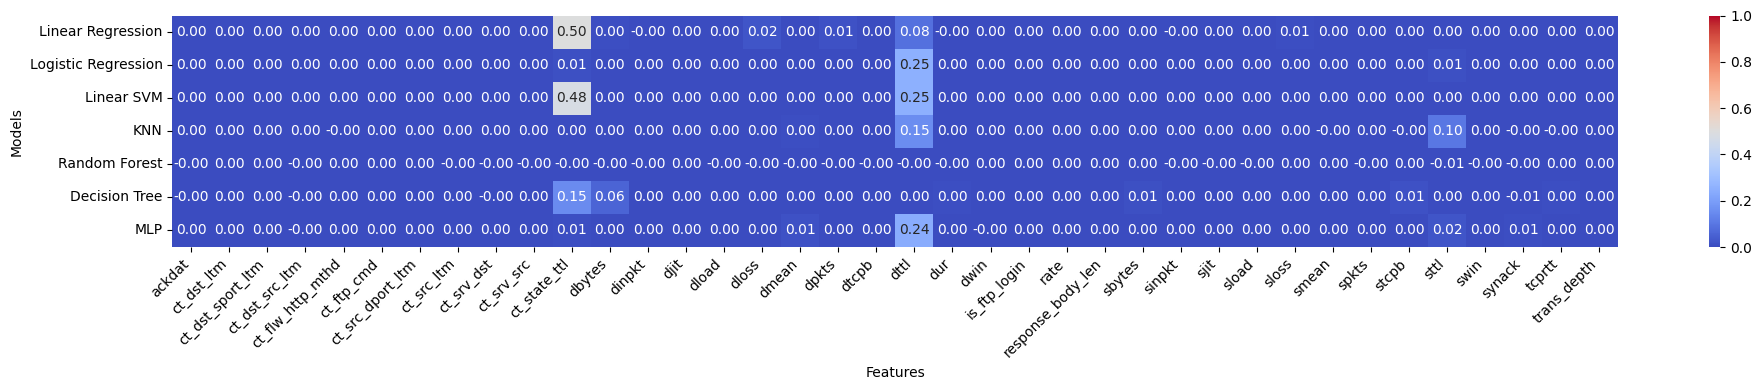

In [352]:
plt.figure(figsize=(20, 4))
sns.heatmap(df_accuracy_drops_bin, annot=True, cmap="coolwarm", fmt=".2f",vmin=0,vmax=1)
# plt.title('Occlusion Sensitivity for All Features Across Models')
plt.ylabel('Models')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

MASKING TWO MOST IMPORTANT FEATURES

In [353]:
data = {
    'Model': [
        'Linear Regression',
        'Logistic Regression',
        'Linear SVM',
        'KNN Classifier',
        'Random Forest Classifier',
        'Decision Tree Classifier',
        'MLP Classifier'
    ],
    'Original Accuracy (%)': [
        97.86264,
        97.84416,
        97.85032,
        98.30613,
        98.63258,
        98.10902,
        98.38620
    ],
    'Masked Features': [
        "'ct_state_ttl', 'ct_dst_src_ltm'",
        "'ct_state_ttl', 'ct_dst_src_ltm'",
        "'ct_state_ttl'",
        "'ct_state_ttl', 'sttl'",
        "'sttl', 'ct_srv_src'",
        "'sttl', 'rate'",
        "'sttl', 'ct_state_ttl'"
    ],
    'New Accuracy (%)': [
        32.57161,
        26.02402,
        24.07761,
        71.06252,
        77.55467,
        24.07761,
        25.91315
    ],
    'Accuracy Drop (%)': [
        65.29103,
        71.82014,
        73.77271,
        27.24361,
        21.07791,
        74.03141,
        72.47305
    ]
}
df_masking_results = pd.DataFrame(data)
df_masking_results


,Model,Original Accuracy (%),Masked Features,New Accuracy (%),Accuracy Drop (%)
0,Linear Regression,97.86264,"'ct_state_ttl', 'ct_dst_src_ltm'",32.57161,65.29103
1,Logistic Regression,97.84416,"'ct_state_ttl', 'ct_dst_src_ltm'",26.02402,71.82014
2,Linear SVM,97.85032,'ct_state_ttl',24.07761,73.77271
3,KNN Classifier,98.30613,"'ct_state_ttl', 'sttl'",71.06252,27.24361
4,Random Forest Classifier,98.63258,"'sttl', 'ct_srv_src'",77.55467,21.07791
5,Decision Tree Classifier,98.10902,"'sttl', 'rate'",24.07761,74.03141
6,MLP Classifier,98.38620,"'sttl', 'ct_state_ttl'",25.91315,72.47305


In [354]:
models = [
    'Linear Regression',
    'Logistic Regression',
    'Linear SVM',
    'KNN Classifier',
    'Random Forest Classifier',
    'Decision Tree Classifier',
    'MLP Classifier'
]
accuracy_drop_percentages = [65.29103, 71.82014, 73.77271, 27.24361, 21.07791, 74.03141, 72.47305]
df_accuracy_drop = pd.DataFrame({
    'Model': models,
    'Accuracy Drop (%)': accuracy_drop_percentages
})
df_accuracy_drop.set_index('Model', inplace=True)
df_accuracy_drop_reshaped = df_accuracy_drop.T

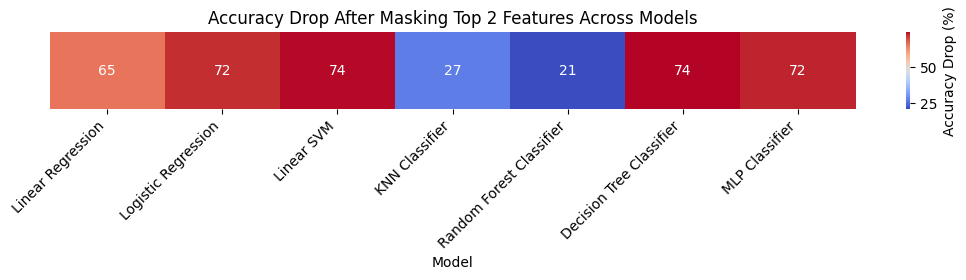

In [355]:
plt.figure(figsize=(13, 1))
sns.heatmap(df_accuracy_drop_reshaped, annot=True, cmap="coolwarm", cbar_kws={'label': 'Accuracy Drop (%)'})
plt.title('Accuracy Drop After Masking Top 2 Features Across Models')
plt.yticks([])
plt.xticks(rotation=45, ha='right')
plt.show()

# **MULTI-CLASS CLASSIFICATION**

## **Data Splitting**

In [356]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [357]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

## **Linear Regression**

In [358]:
lr_multi = LinearRegression()

from datetime import datetime
start = datetime.now()
lr_multi.fit(X_train, y_train)
end = datetime.now()
lr_trainTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 21020.0 µs


In [359]:
from datetime import datetime
start = datetime.now()
y_preda = lr_multi.predict(X_test)
end = datetime.now()

lr_inferTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 2992.0 µs


In [360]:
for i in range(len(y_preda)):
  y_preda[i] = int(round(y_preda[i]))
# y_preda_rounded = [int(round(value)) for value in y_preda]

In [361]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_preda))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_preda))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_preda)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_preda)*100)
print("Accuracy - ",accuracy_score(y_test,y_preda)*100)

Mean Absolute Error -  3.695809248554913
Mean Squared Error -  15.048410404624278
Root Mean Squared Error -  3.8792280681373037
R2 Score -  0.4022430795282417
Accuracy -  0.2167630057803468


In [362]:
accuracy_drop_lr_multi = []
original_accuracy_lr_multi = accuracy_score(y_test, y_preda)
print(f"Original Accuracy: {original_accuracy_lr_multi*100:.2f}%")
for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = lr_multi.predict(X_test_modified)
    y_pred_modified = [int(round(value)) for value in y_pred_modified]
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop = original_accuracy_lr_multi - new_accuracy
    accuracy_drop_lr_multi.append((feature, accuracy_drop))
print("\nOcclusion Sensitivity Analysis (Linear Regression - Multi-class):")
for feature, drop in sorted(accuracy_drop_lr_multi, key=lambda x: x[1], reverse=True):
    print(f"{feature}: Accuracy Drop = {drop:.5f}")

Original Accuracy: 0.22%

Occlusion Sensitivity Analysis (Linear Regression - Multi-class):
dttl: Accuracy Drop = 0.00072
dloss: Accuracy Drop = 0.00072
ct_state_ttl: Accuracy Drop = 0.00072
ct_flw_http_mthd: Accuracy Drop = 0.00072
dur: Accuracy Drop = 0.00000
spkts: Accuracy Drop = 0.00000
dpkts: Accuracy Drop = 0.00000
sbytes: Accuracy Drop = 0.00000
dbytes: Accuracy Drop = 0.00000
rate: Accuracy Drop = 0.00000
sttl: Accuracy Drop = 0.00000
sload: Accuracy Drop = 0.00000
dload: Accuracy Drop = 0.00000
sloss: Accuracy Drop = 0.00000
sinpkt: Accuracy Drop = 0.00000
dinpkt: Accuracy Drop = 0.00000
sjit: Accuracy Drop = 0.00000
djit: Accuracy Drop = 0.00000
swin: Accuracy Drop = 0.00000
stcpb: Accuracy Drop = 0.00000
dtcpb: Accuracy Drop = 0.00000
dwin: Accuracy Drop = 0.00000
tcprtt: Accuracy Drop = 0.00000
synack: Accuracy Drop = 0.00000
ackdat: Accuracy Drop = 0.00000
smean: Accuracy Drop = 0.00000
dmean: Accuracy Drop = 0.00000
trans_depth: Accuracy Drop = 0.00000
response_body_len:

In [363]:
accuracy_drop_lr_multi_sorted = sorted(accuracy_drop_lr_multi, key=lambda x: x[0], reverse=False)
accuracy_drop_lr_multi_sorted

[('ackdat', 0.0),
 ('ct_dst_ltm', 0.0),
 ('ct_dst_sport_ltm', 0.0),
 ('ct_dst_src_ltm', 0.0),
 ('ct_flw_http_mthd', 0.0007225433526011559),
 ('ct_ftp_cmd', 0.0),
 ('ct_src_dport_ltm', 0.0),
 ('ct_src_ltm', 0.0),
 ('ct_srv_dst', 0.0),
 ('ct_srv_src', 0.0),
 ('ct_state_ttl', 0.0007225433526011559),
 ('dbytes', 0.0),
 ('dinpkt', 0.0),
 ('djit', 0.0),
 ('dload', 0.0),
 ('dloss', 0.0007225433526011559),
 ('dmean', 0.0),
 ('dpkts', 0.0),
 ('dtcpb', 0.0),
 ('dttl', 0.0007225433526011559),
 ('dur', 0.0),
 ('dwin', 0.0),
 ('is_ftp_login', 0.0),
 ('rate', 0.0),
 ('response_body_len', 0.0),
 ('sbytes', 0.0),
 ('sinpkt', 0.0),
 ('sjit', 0.0),
 ('sload', 0.0),
 ('sloss', 0.0),
 ('smean', 0.0),
 ('spkts', 0.0),
 ('stcpb', 0.0),
 ('sttl', 0.0),
 ('swin', 0.0),
 ('synack', 0.0),
 ('tcprtt', 0.0),
 ('trans_depth', 0.0)]

In [364]:
print(classification_report(y_test, y_preda,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      0.09      0.17        11
      Backdoor       0.00      1.00      0.00         2
           DoS       0.00      0.00      0.00        37
      Exploits       0.00      0.00      0.00       282
       Fuzzers       0.00      0.00      0.00        46
       Generic       0.00      0.00      0.00       692
        Normal       0.00      0.00      0.00       290
Reconnaissance       0.00      0.00      0.00        20
         Worms       0.00      0.00      0.00         4

      accuracy                           0.00      1384
     macro avg       0.11      0.12      0.02      1384
  weighted avg       0.01      0.00      0.00      1384



c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Saving Trained Model to Disk**

In [365]:
# pkl_filename = "./models/linear_regressor_multi.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(lr_multi, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## **Logistic Regression**

In [366]:
logr_multi = LogisticRegression(random_state=123, max_iter=5000,solver='newton-cg',multi_class='multinomial')

from datetime import datetime
start = datetime.now()
logr_multi.fit(X_train,y_train)
end = datetime.now()

lgr_trainTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Elapsed 153008.0 µs


In [367]:
from datetime import datetime
start = datetime.now()
y_predb = logr_multi.predict(X_test)
end = datetime.now()

lgr_inferTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 4002.0000000000005 µs


In [368]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_predb))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_predb))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_predb)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_predb)*100)
print("Accuracy - ",accuracy_score(y_test,y_predb)*100)

Mean Absolute Error -  0.23265895953757226
Mean Squared Error -  0.6632947976878613
Root Mean Squared Error -  0.8144291237964549
R2 Score -  56.341280643533324
Accuracy -  89.08959537572254


In [369]:
accuracy_drop_logr_multi = {}
original_accuracy_logr_multi = accuracy_score(y_test, y_predb)
print(f"Original Accuracy: {original_accuracy_logr_multi*100:.2f}%")
for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = logr_multi.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop = original_accuracy_logr_multi - new_accuracy
    accuracy_drop_logr_multi[feature] = accuracy_drop
sorted_accuracy_drops = sorted(accuracy_drop_logr_multi.items(), key=lambda x: x[1], reverse=True)
print("\nOcclusion Sensitivity Analysis (Logistic Regression - Multi-class):")
for feature, drop in sorted_accuracy_drops:
  print(f"{feature}: Accuracy Drop = {drop:.5f}")
    # if drop > 0:
    #     print(f"{feature}: Accuracy Drop = {drop:.5f}")

Original Accuracy: 89.09%

Occlusion Sensitivity Analysis (Logistic Regression - Multi-class):
dttl: Accuracy Drop = 0.18064
sttl: Accuracy Drop = 0.02023
dur: Accuracy Drop = 0.00650
ct_state_ttl: Accuracy Drop = 0.00434
smean: Accuracy Drop = 0.00145
ct_flw_http_mthd: Accuracy Drop = 0.00145
stcpb: Accuracy Drop = 0.00072
tcprtt: Accuracy Drop = 0.00072
synack: Accuracy Drop = 0.00072
ct_srv_src: Accuracy Drop = 0.00072
spkts: Accuracy Drop = 0.00000
dpkts: Accuracy Drop = 0.00000
sbytes: Accuracy Drop = 0.00000
dbytes: Accuracy Drop = 0.00000
rate: Accuracy Drop = 0.00000
sload: Accuracy Drop = 0.00000
dload: Accuracy Drop = 0.00000
sloss: Accuracy Drop = 0.00000
dloss: Accuracy Drop = 0.00000
sinpkt: Accuracy Drop = 0.00000
dinpkt: Accuracy Drop = 0.00000
sjit: Accuracy Drop = 0.00000
djit: Accuracy Drop = 0.00000
swin: Accuracy Drop = 0.00000
dtcpb: Accuracy Drop = 0.00000
dwin: Accuracy Drop = 0.00000
dmean: Accuracy Drop = 0.00000
trans_depth: Accuracy Drop = 0.00000
response_bo

In [370]:
accuracy_drop_lgr_multi_sorted = sorted(sorted_accuracy_drops, key=lambda x: x[0], reverse=False)
accuracy_drop_lgr_multi_sorted

[('ackdat', -0.0007225433526011349),
 ('ct_dst_ltm', -0.0007225433526011349),
 ('ct_dst_sport_ltm', 0.0),
 ('ct_dst_src_ltm', 0.0),
 ('ct_flw_http_mthd', 0.0014450867052022698),
 ('ct_ftp_cmd', 0.0),
 ('ct_src_dport_ltm', 0.0),
 ('ct_src_ltm', 0.0),
 ('ct_srv_dst', -0.0007225433526011349),
 ('ct_srv_src', 0.0007225433526011349),
 ('ct_state_ttl', 0.00433526011560692),
 ('dbytes', 0.0),
 ('dinpkt', 0.0),
 ('djit', 0.0),
 ('dload', 0.0),
 ('dloss', 0.0),
 ('dmean', 0.0),
 ('dpkts', 0.0),
 ('dtcpb', 0.0),
 ('dttl', 0.18063583815028894),
 ('dur', 0.006502890173410436),
 ('dwin', 0.0),
 ('is_ftp_login', 0.0),
 ('rate', 0.0),
 ('response_body_len', 0.0),
 ('sbytes', 0.0),
 ('sinpkt', 0.0),
 ('sjit', 0.0),
 ('sload', 0.0),
 ('sloss', 0.0),
 ('smean', 0.0014450867052022698),
 ('spkts', 0.0),
 ('stcpb', 0.0007225433526011349),
 ('sttl', 0.020231213872832332),
 ('swin', 0.0),
 ('synack', 0.0007225433526011349),
 ('tcprtt', 0.0007225433526011349),
 ('trans_depth', 0.0)]

In [371]:
X_test_modified_both = X_test.copy()
X_test_modified_both['dttl'] = 0
X_test_modified_both['swin'] = 0
y_pred_modified_both = logr_multi.predict(X_test_modified_both)
new_accuracy_both = accuracy_score(y_test, y_pred_modified_both)
drop_both = original_accuracy_logr_multi - new_accuracy_both
print(f"Original Accuracy: {original_accuracy_logr_multi*100:.2f}%")
print(f"Accuracy after masking 'dttl' and 'swin' together: {new_accuracy_both*100:.2f}% (Drop: {drop_both*100:.2f}%)")

Original Accuracy: 89.09%
Accuracy after masking 'dttl' and 'swin' together: 71.03% (Drop: 18.06%)


In [372]:
print(classification_report(y_test, y_predb,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      0.09      0.17        11
      Backdoor       0.00      0.00      0.00         2
           DoS       0.00      0.00      0.00        37
      Exploits       0.67      0.97      0.79       282
       Fuzzers       1.00      0.20      0.33        46
       Generic       0.99      0.99      0.99       692
        Normal       0.99      0.92      0.95       290
Reconnaissance       0.00      0.00      0.00        20
         Worms       0.00      0.00      0.00         4

      accuracy                           0.89      1384
     macro avg       0.52      0.35      0.36      1384
  weighted avg       0.88      0.89      0.87      1384



c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [373]:
y_predb_sample = y_predb
unique_classes, counts = np.unique(y_predb_sample, return_counts=True)
class_counts = list(zip(unique_classes, counts))
sorted_class_counts = sorted(class_counts, key=lambda x: x[1], reverse=True)
df_class_ranks = pd.DataFrame(sorted_class_counts, columns=['Class', 'Count']).set_index('Class')
class_names_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Worms'
}
df_class_ranks.index = df_class_ranks.index.map(class_names_mapping)
df_class_ranks

,Count
Class,
Generic,693
Exploits,410
Normal,270
Fuzzers,9
Analysis,1
Reconnaissance,1


### **Saving Trained Model to Disk**

In [374]:
# pkl_filename = "./models/logistic_regressor_multi.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(logr_multi, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## **Linear Support Vector Machine**

In [375]:
lsvm_multi = SVC(kernel='linear',gamma='auto')

from datetime import datetime
start = datetime.now()
lsvm_multi.fit(X_train,y_train)
end = datetime.now()
lsvm_trainTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 211913.0 µs


In [376]:
from datetime import datetime
start = datetime.now()
y_predc = lsvm_multi.predict(X_test)
end = datetime.now()
lsvm_inferTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 39840.0 µs


In [377]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_predc))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_predc))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_predc)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_predc)*100)
print("Accuracy - ",accuracy_score(y_test,y_predc)*100)

Mean Absolute Error -  0.22254335260115607
Mean Squared Error -  0.6242774566473989
Root Mean Squared Error -  0.7901123063510648
R2 Score -  59.119618395643414
Accuracy -  89.378612716763


In [378]:
accuracy_drop_lsvm_multi = {}
original_accuracy_lsvm_multi = accuracy_score(y_test, y_predc)
print(f"Original Accuracy: {original_accuracy_lsvm_multi*100:.2f}%")
for feature in X.columns:
    print(feature)
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = lsvm_multi.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop = original_accuracy_lsvm_multi - new_accuracy
    accuracy_drop_lsvm_multi[feature] = accuracy_drop
sorted_accuracy_drops = sorted(accuracy_drop_lsvm_multi.items(), key=lambda x: x[1], reverse=True)

print("\nOcclusion Sensitivity Analysis (Linear SVM - Multi-class):")
for feature, drop in sorted_accuracy_drops:
    # if drop > 0:
    print(f"{feature}: Accuracy Drop = {drop*100:.2f}%")

Original Accuracy: 89.38%
dur
spkts
dpkts
sbytes
dbytes
rate
sttl
dttl
sload
dload
sloss
dloss
sinpkt
dinpkt
sjit
djit
swin
stcpb
dtcpb
dwin
tcprtt
synack
ackdat
smean
dmean
trans_depth
response_body_len
ct_srv_src
ct_state_ttl
ct_dst_ltm
ct_src_dport_ltm
ct_dst_sport_ltm
ct_dst_src_ltm
is_ftp_login
ct_ftp_cmd
ct_flw_http_mthd
ct_src_ltm
ct_srv_dst

Occlusion Sensitivity Analysis (Linear SVM - Multi-class):
dttl: Accuracy Drop = 16.18%
sttl: Accuracy Drop = 6.21%
dur: Accuracy Drop = 0.72%
swin: Accuracy Drop = 0.72%
dwin: Accuracy Drop = 0.72%
ct_state_ttl: Accuracy Drop = 0.14%
rate: Accuracy Drop = 0.07%
sload: Accuracy Drop = 0.07%
smean: Accuracy Drop = 0.07%
ct_flw_http_mthd: Accuracy Drop = 0.07%
spkts: Accuracy Drop = 0.00%
dpkts: Accuracy Drop = 0.00%
sbytes: Accuracy Drop = 0.00%
dbytes: Accuracy Drop = 0.00%
dload: Accuracy Drop = 0.00%
sloss: Accuracy Drop = 0.00%
dloss: Accuracy Drop = 0.00%
sinpkt: Accuracy Drop = 0.00%
dinpkt: Accuracy Drop = 0.00%
sjit: Accuracy Drop = 

In [379]:
accuracy_drop_lsvm_multi_sorted = sorted(accuracy_drop_lsvm_multi.items(), key=lambda x: x[0], reverse=False)
accuracy_drop_lsvm_multi_sorted

[('ackdat', 0.0),
 ('ct_dst_ltm', 0.0),
 ('ct_dst_sport_ltm', 0.0),
 ('ct_dst_src_ltm', 0.0),
 ('ct_flw_http_mthd', 0.0007225433526011349),
 ('ct_ftp_cmd', 0.0),
 ('ct_src_dport_ltm', 0.0),
 ('ct_src_ltm', 0.0),
 ('ct_srv_dst', 0.0),
 ('ct_srv_src', 0.0),
 ('ct_state_ttl', 0.0014450867052022698),
 ('dbytes', 0.0),
 ('dinpkt', 0.0),
 ('djit', 0.0),
 ('dload', 0.0),
 ('dloss', 0.0),
 ('dmean', 0.0),
 ('dpkts', 0.0),
 ('dtcpb', 0.0),
 ('dttl', 0.161849710982659),
 ('dur', 0.007225433526011571),
 ('dwin', 0.007225433526011571),
 ('is_ftp_login', 0.0),
 ('rate', 0.0007225433526011349),
 ('response_body_len', 0.0),
 ('sbytes', 0.0),
 ('sinpkt', 0.0),
 ('sjit', 0.0),
 ('sload', 0.0007225433526011349),
 ('sloss', 0.0),
 ('smean', 0.0007225433526011349),
 ('spkts', 0.0),
 ('stcpb', 0.0),
 ('sttl', 0.06213872832369938),
 ('swin', 0.007225433526011571),
 ('synack', 0.0),
 ('tcprtt', 0.0),
 ('trans_depth', 0.0)]

In [380]:
X_test_modified_both = X_test.copy()
X_test_modified_both['dttl'] = 0
X_test_modified_both['ct_state_ttl'] = 0
y_pred_modified_both = lsvm_multi.predict(X_test_modified_both)
new_accuracy_both = accuracy_score(y_test, y_pred_modified_both)
drop_both = original_accuracy_lsvm_multi - new_accuracy_both
print(f"Original Accuracy: {original_accuracy_lsvm_multi*100:.2f}%")
print(f"Accuracy after masking 'dttl' and 'ct_state_ttl' together: {new_accuracy_both*100:.2f}% (Drop: {drop_both*100:.2f}%)")

Original Accuracy: 89.38%
Accuracy after masking 'dttl' and 'ct_state_ttl' together: 73.19% (Drop: 16.18%)


In [381]:
y_predc_sample = y_predc
unique_classes, counts = np.unique(y_predc_sample, return_counts=True)
class_counts = list(zip(unique_classes, counts))
sorted_class_counts = sorted(class_counts, key=lambda x: x[1], reverse=True)
df_class_ranks = pd.DataFrame(sorted_class_counts, columns=['Class', 'Count']).set_index('Class')
class_names_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Worms'
}
df_class_ranks.index = df_class_ranks.index.map(class_names_mapping)
df_class_ranks

,Count
Class,
Generic,692
Exploits,416
Normal,265
Fuzzers,10
Analysis,1


In [382]:
print(classification_report(y_test, y_predc,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      0.09      0.17        11
      Backdoor       0.00      0.00      0.00         2
           DoS       0.00      0.00      0.00        37
      Exploits       0.67      0.98      0.79       282
       Fuzzers       1.00      0.22      0.36        46
       Generic       0.99      0.99      0.99       692
        Normal       1.00      0.91      0.95       290
Reconnaissance       0.00      0.00      0.00        20
         Worms       0.00      0.00      0.00         4

      accuracy                           0.89      1384
     macro avg       0.52      0.35      0.36      1384
  weighted avg       0.88      0.89      0.87      1384



c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Saving Trained Model to Disk**

In [383]:
# pkl_filename = "./models/lsvm_multi.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(lsvm_multi, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## **K Nearest Neighbor Classifier**

In [384]:
knn_multi = KNeighborsClassifier(n_neighbors=5)

from datetime import datetime
start = datetime.now()
knn_multi.fit(X_train,y_train)
end = datetime.now()

knn_trainTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 4999.0 µs


In [385]:
from datetime import datetime
start = datetime.now()
y_predd = knn_multi.predict(X_test)
end = datetime.now()

knn_inferTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 287153.0 µs


In [386]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_predd))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_predd))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_predd)))
print("Accuracy - ",accuracy_score(y_test,y_predd)*100)

Mean Absolute Error -  0.22976878612716764
Mean Squared Error -  0.6604046242774566
Root Mean Squared Error -  0.8126528313354089
Accuracy -  89.45086705202311


In [387]:
accuracy_drop_knn_multi = {}
original_accuracy_knn_multi = accuracy_score(y_test, y_predd)
print(f"Original Accuracy: {original_accuracy_knn_multi*100:.2f}%")
for feature in X.columns:
    print(feature)
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = knn_multi.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop = original_accuracy_knn_multi - new_accuracy
    accuracy_drop_knn_multi[feature] = accuracy_drop
sorted_accuracy_drops = sorted(accuracy_drop_knn_multi.items(), key=lambda x: x[1], reverse=True)
print("\nOcclusion Sensitivity Analysis (KNN - Multi-class):")
for feature, drop in sorted_accuracy_drops:
    # if drop > 0:
    print(f"{feature}: Accuracy Drop = {drop*100:.2f}%")

Original Accuracy: 89.45%
dur
spkts
dpkts
sbytes
dbytes
rate
sttl
dttl
sload
dload
sloss
dloss
sinpkt
dinpkt
sjit
djit
swin
stcpb
dtcpb
dwin
tcprtt
synack
ackdat
smean
dmean
trans_depth
response_body_len
ct_srv_src
ct_state_ttl
ct_dst_ltm
ct_src_dport_ltm
ct_dst_sport_ltm
ct_dst_src_ltm
is_ftp_login
ct_ftp_cmd
ct_flw_http_mthd
ct_src_ltm
ct_srv_dst

Occlusion Sensitivity Analysis (KNN - Multi-class):
sttl: Accuracy Drop = 22.33%
dttl: Accuracy Drop = 13.08%
dur: Accuracy Drop = 0.79%
dmean: Accuracy Drop = 0.72%
smean: Accuracy Drop = 0.58%
synack: Accuracy Drop = 0.36%
ct_dst_src_ltm: Accuracy Drop = 0.29%
ct_srv_dst: Accuracy Drop = 0.29%
rate: Accuracy Drop = 0.22%
stcpb: Accuracy Drop = 0.22%
tcprtt: Accuracy Drop = 0.22%
ct_srv_src: Accuracy Drop = 0.22%
sload: Accuracy Drop = 0.14%
ct_state_ttl: Accuracy Drop = 0.14%
is_ftp_login: Accuracy Drop = 0.14%
ct_ftp_cmd: Accuracy Drop = 0.14%
dinpkt: Accuracy Drop = 0.07%
ct_dst_sport_ltm: Accuracy Drop = 0.07%
ct_flw_http_mthd: Accurac

In [388]:
accuracy_drop_knn_multi_sorted = sorted(accuracy_drop_knn_multi.items(), key=lambda x: x[0], reverse=False)
accuracy_drop_knn_multi_sorted

[('ackdat', 0.0),
 ('ct_dst_ltm', 0.0),
 ('ct_dst_sport_ltm', 0.0007225433526011349),
 ('ct_dst_src_ltm', 0.0028901734104046506),
 ('ct_flw_http_mthd', 0.0007225433526011349),
 ('ct_ftp_cmd', 0.0014450867052022698),
 ('ct_src_dport_ltm', 0.0),
 ('ct_src_ltm', -0.0014450867052023808),
 ('ct_srv_dst', 0.0028901734104046506),
 ('ct_srv_src', 0.0021676300578034047),
 ('ct_state_ttl', 0.0014450867052022698),
 ('dbytes', 0.0),
 ('dinpkt', 0.0007225433526011349),
 ('djit', 0.0),
 ('dload', 0.0),
 ('dloss', 0.0),
 ('dmean', 0.007225433526011571),
 ('dpkts', 0.0),
 ('dtcpb', -0.005057803468208055),
 ('dttl', 0.1307803468208092),
 ('dur', 0.007947976878612706),
 ('dwin', 0.0),
 ('is_ftp_login', 0.0014450867052022698),
 ('rate', 0.0021676300578034047),
 ('response_body_len', 0.0),
 ('sbytes', 0.0),
 ('sinpkt', 0.0),
 ('sjit', 0.0),
 ('sload', 0.0014450867052022698),
 ('sloss', 0.0),
 ('smean', 0.00578034682080919),
 ('spkts', 0.0),
 ('stcpb', 0.0021676300578034047),
 ('sttl', 0.22326589595375723)

In [389]:
X_test_modified_both = X_test.copy()
X_test_modified_both['dttl'] = 0
X_test_modified_both['swin'] = 0
y_pred_modified_both = knn_multi.predict(X_test_modified_both)
new_accuracy_both = accuracy_score(y_test, y_pred_modified_both)
drop_both = original_accuracy_knn_multi - new_accuracy_both
print(f"Original Accuracy: {original_accuracy_knn_multi*100:.2f}%")
print(f"Accuracy after masking 'dttl' and 'swin' together: {new_accuracy_both*100:.2f}% (Drop: {drop_both*100:.2f}%)")

Original Accuracy: 89.45%
Accuracy after masking 'dttl' and 'swin' together: 74.21% (Drop: 15.25%)


In [390]:
y_predd_sample = y_predd
unique_classes, counts = np.unique(y_predd_sample, return_counts=True)
class_counts = list(zip(unique_classes, counts))
sorted_class_counts = sorted(class_counts, key=lambda x: x[1], reverse=True)
df_class_ranks = pd.DataFrame(sorted_class_counts, columns=['Class', 'Count']).set_index('Class')
class_names_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Worms'
}
df_class_ranks.index = df_class_ranks.index.map(class_names_mapping)

df_class_ranks

,Count
Class,
Generic,686
Exploits,372
Normal,279
Fuzzers,29
DoS,11
Reconnaissance,6
Analysis,1


In [391]:
 print(classification_report(y_test, y_predd,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      0.09      0.17        11
      Backdoor       0.00      0.00      0.00         2
           DoS       0.09      0.03      0.04        37
      Exploits       0.70      0.93      0.80       282
       Fuzzers       0.72      0.46      0.56        46
       Generic       1.00      0.99      0.99       692
        Normal       0.97      0.93      0.95       290
Reconnaissance       0.00      0.00      0.00        20
         Worms       0.00      0.00      0.00         4

      accuracy                           0.89      1384
     macro avg       0.50      0.38      0.39      1384
  weighted avg       0.88      0.89      0.88      1384



c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Saving Trained Model to Disk**

In [392]:
# pkl_filename = "./models/knn_multi.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(knn_multi, file)
#   print("Saved model to disk")
# else:zx
#   print("Model already saved")

## **Random Forest Classifier**

In [393]:
rf_multi = RandomForestClassifier(random_state=50)

from datetime import datetime
start = datetime.now()
rf_multi.fit(X_train,y_train)
end = datetime.now()

rf_trainTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 1084809.0 µs


In [394]:

from datetime import datetime
start = datetime.now()
y_prede = rf_multi.predict(X_test)
end = datetime.now()

rf_inferTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 32404.000000000004 µs


In [395]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_prede))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_prede))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_prede)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_prede)*100)
print("Accuracy - ",accuracy_score(y_test,y_prede)*100)

Mean Absolute Error -  0.20881502890173412
Mean Squared Error -  0.7059248554913294
Root Mean Squared Error -  0.8401933441127283
R2 Score -  53.07304258848096
Accuracy -  91.47398843930635


In [396]:
accuracy_drop_rf_multi = {}
original_accuracy_rf_multi = accuracy_score(y_test, y_prede)
for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = rf_multi.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop = original_accuracy_rf_multi - new_accuracy
    accuracy_drop_rf_multi[feature] = accuracy_drop
sorted_accuracy_drops = sorted(accuracy_drop_rf_multi.items(), key=lambda x: x[1], reverse=True)
print("Occlusion Sensitivity Analysis (Random Forest - Multi-class):")
for feature, drop in sorted_accuracy_drops:
    # if drop > 0:
      print(f"{feature}: Accuracy Drop = {drop*100:.2f}%")

Occlusion Sensitivity Analysis (Random Forest - Multi-class):
sbytes: Accuracy Drop = 0.51%
djit: Accuracy Drop = 0.29%
ct_srv_src: Accuracy Drop = 0.29%
ct_state_ttl: Accuracy Drop = 0.29%
dinpkt: Accuracy Drop = 0.22%
dur: Accuracy Drop = 0.14%
sttl: Accuracy Drop = 0.14%
dttl: Accuracy Drop = 0.14%
dloss: Accuracy Drop = 0.14%
sinpkt: Accuracy Drop = 0.14%
sjit: Accuracy Drop = 0.14%
ct_srv_dst: Accuracy Drop = 0.14%
spkts: Accuracy Drop = 0.07%
dpkts: Accuracy Drop = 0.07%
sloss: Accuracy Drop = 0.07%
trans_depth: Accuracy Drop = 0.07%
ct_flw_http_mthd: Accuracy Drop = 0.07%
dload: Accuracy Drop = 0.00%
swin: Accuracy Drop = 0.00%
dwin: Accuracy Drop = 0.00%
tcprtt: Accuracy Drop = 0.00%
ct_dst_ltm: Accuracy Drop = 0.00%
ct_src_dport_ltm: Accuracy Drop = 0.00%
ct_dst_sport_ltm: Accuracy Drop = 0.00%
ct_dst_src_ltm: Accuracy Drop = 0.00%
is_ftp_login: Accuracy Drop = 0.00%
ct_ftp_cmd: Accuracy Drop = 0.00%
dbytes: Accuracy Drop = -0.07%
rate: Accuracy Drop = -0.07%
sload: Accuracy D

In [397]:
accuracy_drop_rf_multi_sorted = sorted(accuracy_drop_rf_multi.items(), key=lambda x: x[0], reverse=False)
accuracy_drop_rf_multi_sorted

[('ackdat', -0.0007225433526012459),
 ('ct_dst_ltm', 0.0),
 ('ct_dst_sport_ltm', 0.0),
 ('ct_dst_src_ltm', 0.0),
 ('ct_flw_http_mthd', 0.0007225433526011349),
 ('ct_ftp_cmd', 0.0),
 ('ct_src_dport_ltm', 0.0),
 ('ct_src_ltm', -0.0007225433526012459),
 ('ct_srv_dst', 0.0014450867052022698),
 ('ct_srv_src', 0.0028901734104045396),
 ('ct_state_ttl', 0.0028901734104045396),
 ('dbytes', -0.0007225433526012459),
 ('dinpkt', 0.0021676300578034047),
 ('djit', 0.0028901734104045396),
 ('dload', 0.0),
 ('dloss', 0.0014450867052022698),
 ('dmean', -0.0007225433526012459),
 ('dpkts', 0.0007225433526011349),
 ('dtcpb', -0.0007225433526012459),
 ('dttl', 0.0014450867052022698),
 ('dur', 0.0014450867052022698),
 ('dwin', 0.0),
 ('is_ftp_login', 0.0),
 ('rate', -0.0007225433526012459),
 ('response_body_len', -0.0007225433526012459),
 ('sbytes', 0.005057803468208055),
 ('sinpkt', 0.0014450867052022698),
 ('sjit', 0.0014450867052022698),
 ('sload', -0.0007225433526012459),
 ('sloss', 0.000722543352601134

In [398]:
X_test_modified_single = X_test.copy()
X_test_modified_single['dttl'] = 0
y_pred_modified_single = rf_multi.predict(X_test_modified_single)
new_accuracy_single = accuracy_score(y_test, y_pred_modified_single)
drop_single = original_accuracy_rf_multi - new_accuracy_single
print(f"Original Accuracy: {original_accuracy_rf_multi*100:.2f}%")
print(f"Accuracy after masking the most important feature 'dttl': {new_accuracy_single*100:.2f}% (Drop: {drop_single*100:.2f}%)")

Original Accuracy: 91.47%
Accuracy after masking the most important feature 'dttl': 91.33% (Drop: 0.14%)


In [399]:
print(classification_report(y_test, y_prede,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       0.75      0.27      0.40        11
      Backdoor       0.00      0.00      0.00         2
           DoS       0.00      0.00      0.00        37
      Exploits       0.78      0.94      0.85       282
       Fuzzers       0.89      0.54      0.68        46
       Generic       1.00      0.99      0.99       692
        Normal       0.92      0.97      0.94       290
Reconnaissance       0.44      0.40      0.42        20
         Worms       0.00      0.00      0.00         4

      accuracy                           0.91      1384
     macro avg       0.53      0.46      0.48      1384
  weighted avg       0.89      0.91      0.90      1384



c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Saving Trained Model to Disk**

In [400]:
# pkl_filename = "./models/random_forest_multi.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(rf_multi, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## **Decision Tree Classifier**

In [401]:
dt_multi = DecisionTreeClassifier(random_state=123)

from datetime import datetime
start = datetime.now()
dt_multi.fit(X_train,y_train)
end = datetime.now()
dt_trainTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 83082.0 µs


In [402]:
from datetime import datetime
start = datetime.now()
y_predf = dt_multi.predict(X_test)
end = datetime.now()
dt_inferTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 4002.9999999999995 µs


In [403]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_predf))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_predf))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_predf)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_predf)*100)
print("Accuracy - ",accuracy_score(y_test,y_predf)*100)

Mean Absolute Error -  0.2565028901734104
Mean Squared Error -  0.9241329479768786
Root Mean Squared Error -  0.9613183385210534
R2 Score -  38.7147754904564
Accuracy -  90.17341040462428


In [404]:
accuracy_drop_dt_multi = {}
original_accuracy_dt_multi = accuracy_score(y_test, y_predf)

for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = dt_multi.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop_dt_multi[feature] = original_accuracy_dt_multi - new_accuracy

sorted_accuracy_drops_dt = sorted(accuracy_drop_dt_multi.items(), key=lambda x: x[1], reverse=True)

for feature, drop in sorted_accuracy_drops_dt:
    print(f"{feature}: Accuracy Drop = {drop*100:.2f}%")

sbytes: Accuracy Drop = 40.17%
ct_state_ttl: Accuracy Drop = 19.15%
dbytes: Accuracy Drop = 9.83%
smean: Accuracy Drop = 2.82%
sttl: Accuracy Drop = 2.46%
ct_srv_dst: Accuracy Drop = 2.17%
sinpkt: Accuracy Drop = 1.81%
sload: Accuracy Drop = 1.45%
dinpkt: Accuracy Drop = 1.45%
ct_srv_src: Accuracy Drop = 0.79%
dmean: Accuracy Drop = 0.65%
dtcpb: Accuracy Drop = 0.51%
synack: Accuracy Drop = 0.51%
stcpb: Accuracy Drop = 0.43%
djit: Accuracy Drop = 0.29%
rate: Accuracy Drop = 0.22%
ct_flw_http_mthd: Accuracy Drop = 0.14%
dur: Accuracy Drop = 0.07%
dloss: Accuracy Drop = 0.07%
ackdat: Accuracy Drop = 0.07%
ct_dst_ltm: Accuracy Drop = 0.07%
spkts: Accuracy Drop = 0.00%
dpkts: Accuracy Drop = 0.00%
dttl: Accuracy Drop = 0.00%
sloss: Accuracy Drop = 0.00%
swin: Accuracy Drop = 0.00%
dwin: Accuracy Drop = 0.00%
tcprtt: Accuracy Drop = 0.00%
trans_depth: Accuracy Drop = 0.00%
ct_dst_src_ltm: Accuracy Drop = 0.00%
is_ftp_login: Accuracy Drop = 0.00%
ct_ftp_cmd: Accuracy Drop = 0.00%
ct_src_ltm:

In [405]:
accuracy_drop_dt_multi_sorted = sorted(accuracy_drop_dt_multi.items(), key=lambda x: x[0], reverse=False)
accuracy_drop_dt_multi_sorted

[('ackdat', 0.0007225433526011349),
 ('ct_dst_ltm', 0.0007225433526011349),
 ('ct_dst_sport_ltm', -0.0007225433526011349),
 ('ct_dst_src_ltm', 0.0),
 ('ct_flw_http_mthd', 0.0014450867052022698),
 ('ct_ftp_cmd', 0.0),
 ('ct_src_dport_ltm', -0.00433526011560692),
 ('ct_src_ltm', 0.0),
 ('ct_srv_dst', 0.021676300578034713),
 ('ct_srv_src', 0.007947976878612706),
 ('ct_state_ttl', 0.1914739884393063),
 ('dbytes', 0.09826589595375723),
 ('dinpkt', 0.014450867052023142),
 ('djit', 0.0028901734104046506),
 ('dload', -0.0007225433526011349),
 ('dloss', 0.0007225433526011349),
 ('dmean', 0.006502890173410436),
 ('dpkts', 0.0),
 ('dtcpb', 0.005057803468208055),
 ('dttl', 0.0),
 ('dur', 0.0007225433526011349),
 ('dwin', 0.0),
 ('is_ftp_login', 0.0),
 ('rate', 0.0021676300578035157),
 ('response_body_len', -0.0014450867052022698),
 ('sbytes', 0.40173410404624277),
 ('sinpkt', 0.018063583815028927),
 ('sjit', -0.0014450867052022698),
 ('sload', 0.014450867052023142),
 ('sloss', 0.0),
 ('smean', 0.0

In [406]:
X_test_modified_both_dt = X_test.copy()
X_test_modified_both_dt[sorted_accuracy_drops_dt[0][0]] = 0
X_test_modified_both_dt[sorted_accuracy_drops_dt[1][0]] = 0
y_pred_modified_both_dt = dt_multi.predict(X_test_modified_both_dt)
new_accuracy_both_dt = accuracy_score(y_test, y_pred_modified_both_dt)
drop_both_dt = original_accuracy_dt_multi - new_accuracy_both_dt
print(f"Original Accuracy: {original_accuracy_dt_multi*100:.2f}%")
print(f"Accuracy after masking '{sorted_accuracy_drops_dt[0][0]}' and '{sorted_accuracy_drops_dt[1][0]}' together: {new_accuracy_both_dt*100:.2f}% (Drop: {drop_both_dt*100:.2f}%)")

Original Accuracy: 90.17%
Accuracy after masking 'sbytes' and 'ct_state_ttl' together: 50.00% (Drop: 40.17%)


In [407]:
y_predf_sample = y_predf  # Use your actual predictions here
unique_classes_dt, counts_dt = np.unique(y_predf_sample, return_counts=True)
class_counts_dt = list(zip(unique_classes_dt, counts_dt))
sorted_class_counts_dt = sorted(class_counts_dt, key=lambda x: x[1], reverse=True)
df_class_ranks_dt = pd.DataFrame(sorted_class_counts_dt, columns=['Class', 'Count']).set_index('Class')
df_class_ranks_dt.index = df_class_ranks_dt.index.map(class_names_mapping)
df_class_ranks_dt

,Count
Class,
Generic,692
Normal,315
Exploits,285
Fuzzers,30
DoS,28
Reconnaissance,20
Analysis,9
Worms,5


In [408]:
print(classification_report(y_test, y_predf,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       0.56      0.45      0.50        11
      Backdoor       0.00      0.00      0.00         2
           DoS       0.29      0.22      0.25        37
      Exploits       0.83      0.84      0.83       282
       Fuzzers       0.77      0.50      0.61        46
       Generic       0.99      0.99      0.99       692
        Normal       0.90      0.97      0.93       290
Reconnaissance       0.45      0.45      0.45        20
         Worms       0.00      0.00      0.00         4

      accuracy                           0.90      1384
     macro avg       0.53      0.49      0.51      1384
  weighted avg       0.90      0.90      0.90      1384



c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Saving Trained Model to Disk**

In [409]:
# pkl_filename = "./models/decision_tree_multi.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(dt_multi, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## **Multi Layer Perceptron**

In [410]:
mlp_multi = MLPClassifier(random_state=123, solver='adam', max_iter=8000)

from datetime import datetime
start = datetime.now()
mlp_multi.fit(X_train,y_train)
end = datetime.now()

mlp_trainTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")

Elapsed 11365320.0 µs


In [411]:

from datetime import datetime
start = datetime.now()
y_predg = mlp_multi.predict(X_test)
end = datetime.now()

mlp_inferTime_mul = end - start
print("Elapsed", (end - start).total_seconds() * 10**6, "µs")


Elapsed 9975.0 µs


In [412]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_predg))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_predg))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_predg)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_predg)*100)
print("Accuracy - ",accuracy_score(y_test,y_predg)*100)

Mean Absolute Error -  0.21242774566473988
Mean Squared Error -  0.7355491329479769
Root Mean Squared Error -  0.8576416110170826
R2 Score -  51.070585961775606
Accuracy -  91.1849710982659


In [413]:
accuracy_drop_mlp_multi = {}
original_accuracy_mlp_multi = accuracy_score(y_test, y_predg)

for feature in X.columns:
    X_test_modified = X_test.copy()
    X_test_modified[feature] = 0
    y_pred_modified = mlp_multi.predict(X_test_modified)
    new_accuracy = accuracy_score(y_test, y_pred_modified)
    accuracy_drop_mlp_multi[feature] = original_accuracy_mlp_multi - new_accuracy

sorted_accuracy_drops_mlp = sorted(accuracy_drop_mlp_multi.items(), key=lambda x: x[1], reverse=True)

for feature, drop in sorted_accuracy_drops_mlp:
    print(f"{feature}: Accuracy Drop = {drop*100:.2f}%")

dttl: Accuracy Drop = 18.64%
sttl: Accuracy Drop = 2.89%
smean: Accuracy Drop = 2.31%
dwin: Accuracy Drop = 2.24%
dur: Accuracy Drop = 1.08%
swin: Accuracy Drop = 1.08%
dtcpb: Accuracy Drop = 0.65%
synack: Accuracy Drop = 0.65%
ct_srv_dst: Accuracy Drop = 0.65%
ct_dst_src_ltm: Accuracy Drop = 0.22%
dmean: Accuracy Drop = 0.14%
sbytes: Accuracy Drop = 0.07%
sload: Accuracy Drop = 0.07%
ct_srv_src: Accuracy Drop = 0.07%
ct_flw_http_mthd: Accuracy Drop = 0.07%
spkts: Accuracy Drop = 0.00%
dpkts: Accuracy Drop = 0.00%
dbytes: Accuracy Drop = 0.00%
dload: Accuracy Drop = 0.00%
sloss: Accuracy Drop = 0.00%
dloss: Accuracy Drop = 0.00%
sjit: Accuracy Drop = 0.00%
stcpb: Accuracy Drop = 0.00%
ct_state_ttl: Accuracy Drop = 0.00%
ct_dst_sport_ltm: Accuracy Drop = 0.00%
rate: Accuracy Drop = -0.07%
response_body_len: Accuracy Drop = -0.07%
ct_src_dport_ltm: Accuracy Drop = -0.07%
ct_src_ltm: Accuracy Drop = -0.07%
dinpkt: Accuracy Drop = -0.14%
djit: Accuracy Drop = -0.14%
tcprtt: Accuracy Drop =

In [414]:
accuracy_drop_mlp_multi_sorted = sorted(accuracy_drop_mlp_multi.items(), key=lambda x: x[0], reverse=False)
accuracy_drop_mlp_multi_sorted

[('ackdat', -0.0021676300578034047),
 ('ct_dst_ltm', -0.0014450867052022698),
 ('ct_dst_sport_ltm', 0.0),
 ('ct_dst_src_ltm', 0.0021676300578035157),
 ('ct_flw_http_mthd', 0.0007225433526011349),
 ('ct_ftp_cmd', -0.0014450867052022698),
 ('ct_src_dport_ltm', -0.0007225433526011349),
 ('ct_src_ltm', -0.0007225433526011349),
 ('ct_srv_dst', 0.006502890173410436),
 ('ct_srv_src', 0.0007225433526011349),
 ('ct_state_ttl', 0.0),
 ('dbytes', 0.0),
 ('dinpkt', -0.0014450867052022698),
 ('djit', -0.0014450867052022698),
 ('dload', 0.0),
 ('dloss', 0.0),
 ('dmean', 0.0014450867052023808),
 ('dpkts', 0.0),
 ('dtcpb', 0.006502890173410436),
 ('dttl', 0.18641618497109824),
 ('dur', 0.010838150289017356),
 ('dwin', 0.022398843930635848),
 ('is_ftp_login', -0.0014450867052022698),
 ('rate', -0.0007225433526011349),
 ('response_body_len', -0.0007225433526011349),
 ('sbytes', 0.0007225433526011349),
 ('sinpkt', -0.0021676300578034047),
 ('sjit', 0.0),
 ('sload', 0.0007225433526011349),
 ('sloss', 0.0)

In [415]:
X_test_modified_both_mlp = X_test.copy()
X_test_modified_both_mlp[sorted_accuracy_drops_mlp[0][0]] = 0
X_test_modified_both_mlp[sorted_accuracy_drops_mlp[1][0]] = 0
y_pred_modified_both_mlp = mlp_multi.predict(X_test_modified_both_mlp)
new_accuracy_both_mlp = accuracy_score(y_test, y_pred_modified_both_mlp)
drop_both_mlp = original_accuracy_mlp_multi - new_accuracy_both_mlp
print(f"Original Accuracy: {original_accuracy_mlp_multi*100:.2f}%")
print(f"Accuracy after masking '{sorted_accuracy_drops_mlp[0][0]}' and '{sorted_accuracy_drops_mlp[1][0]}' together: {new_accuracy_both_mlp*100:.2f}% (Drop: {drop_both_mlp*100:.2f}%)")


Original Accuracy: 91.18%
Accuracy after masking 'dttl' and 'sttl' together: 70.88% (Drop: 20.30%)


In [416]:
y_predg_sample = y_predg
unique_classes_mlp, counts_mlp = np.unique(y_predg_sample, return_counts=True)
class_counts_mlp = list(zip(unique_classes_mlp, counts_mlp))
sorted_class_counts_mlp = sorted(class_counts_mlp, key=lambda x: x[1], reverse=True)
df_class_ranks_mlp = pd.DataFrame(sorted_class_counts_mlp, columns=['Class', 'Count']).set_index('Class')
df_class_ranks_mlp.index = df_class_ranks_mlp.index.map(class_names_mapping)
df_class_ranks_mlp

,Count
Class,
Generic,685
Exploits,353
Normal,290
Fuzzers,39
Reconnaissance,8
Analysis,5
DoS,4


In [417]:
print(classification_report(y_test, y_predg,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       0.40      0.18      0.25        11
      Backdoor       0.00      0.00      0.00         2
           DoS       0.00      0.00      0.00        37
      Exploits       0.76      0.95      0.85       282
       Fuzzers       0.77      0.65      0.71        46
       Generic       1.00      0.99      0.99       692
        Normal       0.94      0.94      0.94       290
Reconnaissance       0.50      0.20      0.29        20
         Worms       0.00      0.00      0.00         4

      accuracy                           0.91      1384
     macro avg       0.49      0.44      0.45      1384
  weighted avg       0.89      0.91      0.90      1384



c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\miniconda3\envs\hf-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [418]:
# pkl_filename = "./models/mlp_multi.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(mlp_multi, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

In [419]:
fullFeatureNames = []
for item in accuracy_drop_lr_multi_sorted:
  fullFeatureNames.append(item[0])

def extractValues(accuracyDropList):
  valList = []
  for item in accuracyDropList:
    valList.append(item[1])
  # print(len(valList))
  return valList

fullFeatureaccuracy_drops = {
    'Linear Regression': extractValues(accuracy_drop_lr_multi_sorted),
    'Logistic Regression': extractValues(accuracy_drop_lgr_multi_sorted),
    'Linear SVM': extractValues(accuracy_drop_lsvm_multi_sorted),
    'KNN': extractValues(accuracy_drop_knn_multi_sorted),
    'Random Forest': extractValues(accuracy_drop_rf_multi_sorted),
    'Decision Tree': extractValues(accuracy_drop_dt_multi_sorted),
    'MLP': extractValues(accuracy_drop_mlp_multi_sorted),
}

df_accuracy_drops_mul = pd.DataFrame(fullFeatureaccuracy_drops, index=fullFeatureNames)
df_accuracy_drops_mul = df_accuracy_drops_mul.T
df_accuracy_drops_mul


,ackdat,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_ftp_cmd,ct_src_dport_ltm,ct_src_ltm,ct_srv_dst,ct_srv_src,...,sload,sloss,smean,spkts,stcpb,sttl,swin,synack,tcprtt,trans_depth
Linear Regression,0.000000,0.000000,0.000000,0.000000,0.000723,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Logistic Regression,-0.000723,-0.000723,0.000000,0.000000,0.001445,0.000000,0.000000,0.000000,-0.000723,0.000723,...,0.000000,0.000000,0.001445,0.000000,0.000723,0.020231,0.000000,0.000723,0.000723,0.000000
Linear SVM,0.000000,0.000000,0.000000,0.000000,0.000723,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000723,0.000000,0.000723,0.000000,0.000000,0.062139,0.007225,0.000000,0.000000,0.000000
KNN,0.000000,0.000000,0.000723,0.002890,0.000723,0.001445,0.000000,-0.001445,0.002890,0.002168,...,0.001445,0.000000,0.005780,0.000000,0.002168,0.223266,0.000000,0.003613,0.002168,0.000000
Random Forest,-0.000723,0.000000,0.000000,0.000000,0.000723,0.000000,0.000000,-0.000723,0.001445,0.002890,...,-0.000723,0.000723,-0.002168,0.000723,-0.001445,0.001445,0.000000,-0.000723,0.000000,0.000723
Decision Tree,0.000723,0.000723,-0.000723,0.000000,0.001445,0.000000,-0.004335,0.000000,0.021676,0.007948,...,0.014451,0.000000,0.028179,0.000000,0.004335,0.024566,0.000000,0.005058,0.000000,0.000000
MLP,-0.002168,-0.001445,0.000000,0.002168,0.000723,-0.001445,-0.000723,-0.000723,0.006503,0.000723,...,0.000723,0.000000,0.023121,0.000000,0.000000,0.028902,0.010838,0.006503,-0.001445,-0.001445


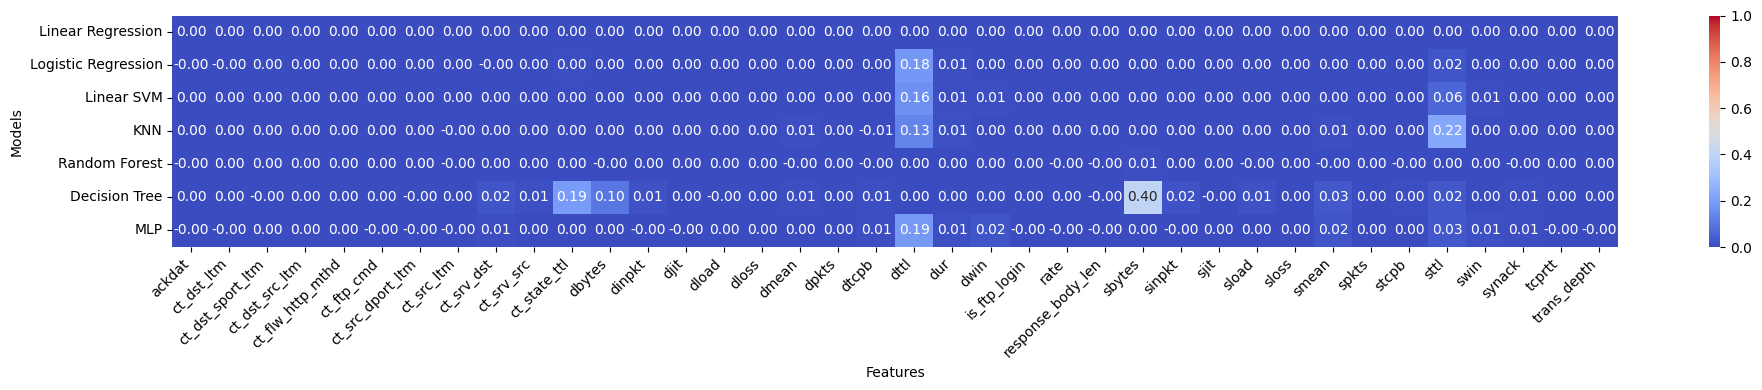

In [420]:
plt.figure(figsize=(20, 4))
sns.heatmap(df_accuracy_drops_mul, annot=True, cmap="coolwarm", fmt=".2f",vmin=0,vmax=1)
# plt.title('Occlusion Sensitivity for All Features Across Models')
plt.ylabel('Models')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

In [421]:
[lr_trainTime_bin, lgr_trainTime_bin, lsvm_trainTime_bin, knn_trainTime_bin, rf_trainTime_bin, dt_trainTime_bin,
                                 mlp_trainTime_bin]

[datetime.timedelta(microseconds=56530),
 datetime.timedelta(microseconds=69541),
 datetime.timedelta(microseconds=158442),
 datetime.timedelta(microseconds=5006),
 datetime.timedelta(microseconds=980315),
 datetime.timedelta(microseconds=72532),
 datetime.timedelta(seconds=11, microseconds=662514)]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'Linear SVM'),
  Text(3, 0, 'K-NN'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'Decision Tree'),
  Text(6, 0, 'MLP')])

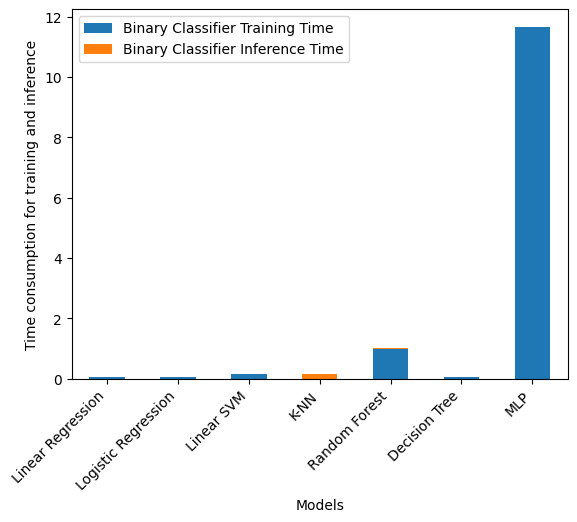

In [422]:
# create DataFrame
df = pd.DataFrame({'Binary Classifier Training Time': [lr_trainTime_bin.total_seconds(), lgr_trainTime_bin.total_seconds(), lsvm_trainTime_bin.total_seconds(), knn_trainTime_bin.total_seconds(), rf_trainTime_bin.total_seconds(), dt_trainTime_bin.total_seconds(),
                                 mlp_trainTime_bin.total_seconds()],
                   'Binary Classifier Inference Time': [lr_inferTime_bin.total_seconds(), lgr_inferTime_bin.total_seconds(), lsvm_inferTime_bin.total_seconds(), knn_inferTime_bin.total_seconds(), rf_inferTime_bin.total_seconds(), dt_inferTime_bin.total_seconds(),
                                 mlp_inferTime_bin.total_seconds()]},
                  index=['Linear Regression', 'Logistic Regression', 'Linear SVM', 'K-NN', 'Random Forest',
                         'Decision Tree', 'MLP'])


# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True)

# labels for x & y axis
plt.xlabel('Models')
plt.ylabel('Time consumption for training and inference')

plt.xticks(rotation=45, ha='right')


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'Linear SVM'),
  Text(3, 0, 'K-NN'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'Decision Tree'),
  Text(6, 0, 'MLP')])

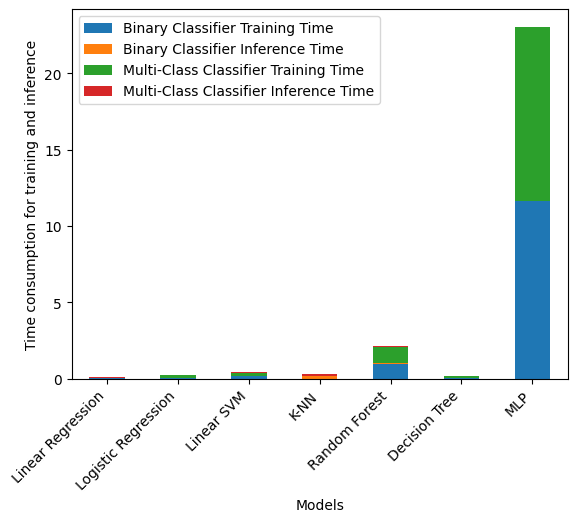

In [423]:
# create DataFrame
df = pd.DataFrame({'Binary Classifier Training Time': [lr_trainTime_bin.total_seconds(), lgr_trainTime_bin.total_seconds(), lsvm_trainTime_bin.total_seconds(), knn_trainTime_bin.total_seconds(), rf_trainTime_bin.total_seconds(), dt_trainTime_bin.total_seconds(),
                                 mlp_trainTime_bin.total_seconds()],
                   'Binary Classifier Inference Time': [lr_inferTime_bin.total_seconds(), lgr_inferTime_bin.total_seconds(), lsvm_inferTime_bin.total_seconds(), knn_inferTime_bin.total_seconds(), rf_inferTime_bin.total_seconds(), dt_inferTime_bin.total_seconds(),
                                 mlp_inferTime_bin.total_seconds()],
                   'Multi-Class Classifier Training Time': [lr_trainTime_mul.total_seconds(), lgr_trainTime_mul.total_seconds(), lsvm_trainTime_mul.total_seconds(), knn_trainTime_mul.total_seconds(), rf_trainTime_mul.total_seconds(), dt_trainTime_mul.total_seconds(),
                                 mlp_trainTime_mul.total_seconds()],
                   'Multi-Class Classifier Inference Time': [lr_inferTime_mul.total_seconds(), lgr_inferTime_mul.total_seconds(), lsvm_inferTime_mul.total_seconds(), knn_inferTime_bin.total_seconds(), rf_inferTime_mul.total_seconds(), dt_inferTime_mul.total_seconds(),
                                 mlp_inferTime_mul.total_seconds()]},
                  index=['Linear Regression', 'Logistic Regression', 'Linear SVM', 'K-NN', 'Random Forest',
                         'Decision Tree', 'MLP'])


# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True)

# labels for x & y axis
plt.xlabel('Models')
plt.ylabel('Time consumption for training and inference')

plt.xticks(rotation=45, ha='right')
